In [217]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
from ydata_profiling import ProfileReport
from collections import Counter

from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.stats import chi2_contingency
from phik import phik_matrix
from math import ceil
import os

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import estimate_bandwidth
from sklearn.mixture import GaussianMixture

from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

#encoders
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [218]:
df = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/DataMining_Proj_Group8/main/XYZ_sports_dataset.csv', 
                 index_col='ID', sep=';')

In [219]:
df.replace("", np.nan, inplace=True)

In [220]:
df.head()

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10000   60  Female  5500.0      2019-09-03       2019-10-31      2019-07-01   
10001   29  Female  2630.0      2014-08-12       2015-09-14      2015-01-01   
10002   23    Male  1980.0      2017-05-02       2017-06-01      2017-01-01   
10003    9    Male     0.0      2018-09-05       2019-02-12      2018-07-01   
10004   35    Male  4320.0      2016-04-20       2018-06-07      2018-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10000       2019-12-31    2019-10-30                     1          89.35   
10001       2015-12-31    2015-07-16                    60         479.20   
10002       2017-06-30    2017-05-25                     7          37.60   
10003       2019-06-30    2019-01-21                    22         155.40   
10004       2018-06-30    2017-11-09                   210         373.20   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
10000          0                  0.0              0.0                1.0   
10001          0                  0.0              0.0                0.0   
10002          0                  0.0              0.0                1.0   
10003          0                  0.0              0.0                0.0   
10004          0                  0.0              0.0                1.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
10000              0.0             0.0               0.0               0.0   
10001              0.0             0.0               0.0               0.0   
10002              0.0             0.0               0.0               0.0   
10003              0.0             1.0               0.0               0.0   
10004              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
10000               0.0                0.0              0.0   
10001               0.0                1.0              0.0   
10002               0.0                0.0              0.0   
10003               0.0                0.0              0.0   
10004               0.0                0.0              NaN   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10000                  9.0                7                       NaN   
10001                 23.0                1                       2.0   
10002                  6.0                0                       7.0   
10003                 20.0                2                       2.0   
10004                 41.0                0                       7.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10000                        6.28                   2                 0   
10001                       17.42                   1                 2   
10002                       30.03                   6                 0   
10003                       17.72                   3                 0   
10004                       60.97                   0                 3   

       HasReferences  NumberOfReferences  Dropout  
ID                                                 
10000            0.0                   0        0  
10001            0.0                   0        1  
10002            0.0                   0        1  
10003            0.0                   0        1  
10004            0.0              

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14942 entries, 10000 to 24941
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14942 non-null  int64  
 1   Gender                      14942 non-null  object 
 2   Income                      14447 non-null  float64
 3   EnrollmentStart             14942 non-null  object 
 4   EnrollmentFinish            14942 non-null  object 
 5   LastPeriodStart             14942 non-null  object 
 6   LastPeriodFinish            14942 non-null  object 
 7   DateLastVisit               14942 non-null  object 
 8   DaysWithoutFrequency        14942 non-null  int64  
 9   LifetimeValue               14942 non-null  float64
 10  UseByTime                   14942 non-null  int64  
 11  AthleticsActivities         14906 non-null  float64
 12  WaterActivities             14905 non-null  float64
 13  FitnessActivities           1490

In [222]:
df.duplicated().sum()

1

In [223]:
df[df.duplicated()]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
22873   12  Female     0.0      2019-06-18       2019-09-10      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
22873       2019-12-31    2019-07-31                    41          73.35   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
22873          0                  0.0              1.0                0.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
22873              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
22873               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
22873                 14.0                7                       5.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
22873                        44.3                  10                 1   

       HasReferences  NumberOfReferences  Dropout  
ID                                                 
22873            0.0                   0        1

In [224]:
df[df.index==22873]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
22873   12  Female     0.0      2019-06-18       2019-09-10      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
22873       2019-12-31    2019-07-31                    41          73.35   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
22873          0                  0.0              1.0                0.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
22873              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
22873               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
22873                 14.0                7                       5.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
22873                        44.3                  10                 1   

       HasReferences  NumberOfReferences  Dropout  
ID                                                 
22873            0.0                   0        1

In [225]:
row = df.loc[22873].squeeze()

same_rows = df[df.eq(row).all(axis=1)]
same_rows

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
18942   12  Female     0.0      2019-06-18       2019-09-10      2019-07-01   
22873   12  Female     0.0      2019-06-18       2019-09-10      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
18942       2019-12-31    2019-07-31                    41          73.35   
22873       2019-12-31    2019-07-31                    41          73.35   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
18942          0                  0.0              1.0                0.0   
22873          0                  0.0              1.0                0.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
18942              0.0             0.0               0.0               0.0   
22873              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
18942               0.0                0.0              0.0   
22873               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
18942                 14.0                7                       5.0   
22873                 14.0                7                       5.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
18942                        44.3                  10                 1   
22873                        44.3                  10                 1   

       HasReferences  NumberOfReferences  Dropout  
ID                                                 
18942            0.0                   0        1  
22873            0.0                   0        1

In [226]:
df.drop_duplicates(inplace = True)

In [227]:
metric_features = ['Age','Income','DaysWithoutFrequency','LifetimeValue','NumberOfFrequencies','AttendedClasses','AllowedWeeklyVisitsBySLA',
                  'AllowedNumberOfVisitsBySLA','RealNumberOfVisits','NumberOfRenewals','NumberOfReferences']
non_metric_features = df.columns.drop(metric_features).to_list()
non_metric_non_temporal = ['UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'DanceActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'NatureActivities', 'SpecialActivities',
       'OtherActivities','HasReferences','Dropout']

In [228]:
df.columns

Index(['Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'DanceActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'NatureActivities', 'SpecialActivities',
       'OtherActivities', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout'],
      dtype='object')

In [229]:
df.describe(include ='all').T

count unique         top  freq         mean  \
Age                         14941.0    NaN         NaN   NaN    26.016732   
Gender                        14941      2      Female  8930          NaN   
Income                      14446.0    NaN         NaN   NaN  2230.970511   
EnrollmentStart               14941   1490  2015-03-02    92          NaN   
EnrollmentFinish              14941   1300  2015-09-16  1684          NaN   
LastPeriodStart               14941     12  2019-07-01  3171          NaN   
LastPeriodFinish              14941     11  2019-12-31  3693          NaN   
DateLastVisit                 14941   1384  2019-10-31   475          NaN   
DaysWithoutFrequency        14941.0    NaN         NaN   NaN    81.227629   
LifetimeValue               14941.0    NaN         NaN   NaN   302.577212   
UseByTime                   14941.0    NaN         NaN   NaN     0.047119   
AthleticsActivities         14905.0    NaN         NaN   NaN      0.00738   
WaterActivities             14904.0    NaN         NaN   NaN     0.296162   
FitnessActivities           14906.0    NaN         NaN   NaN     0.576077   
DanceActivities             14905.0    NaN         NaN   NaN          0.0   
TeamActivities              14906.0    NaN         NaN   NaN     0.055548   
RacketActivities            14904.0    NaN         NaN   NaN     0.023417   
CombatActivities            14908.0    NaN         NaN   NaN     0.107929   
NatureActivities            14894.0    NaN         NaN   NaN          0.0   
SpecialActivities           14897.0    NaN         NaN   NaN     0.026515   
OtherActivities             14906.0    NaN         NaN   NaN     0.001878   
NumberOfFrequencies         14915.0    NaN         NaN   NaN    40.122293   
AttendedClasses             14941.0    NaN         NaN   NaN    10.152667   
AllowedWeeklyVisitsBySLA    14406.0    NaN         NaN   NaN     5.759614   
AllowedNumberOfVisitsBySLA  14941.0    NaN         NaN   NaN    41.636121   
RealNumberOfVisits          14941.0    NaN         NaN   NaN     5.320394   
NumberOfRenewals            14941.0    NaN         NaN   NaN     1.205274   
HasReferences               14929.0    NaN         NaN   NaN     0.019894   
NumberOfReferences          14941.0    NaN         NaN   NaN     0.022288   
Dropout                     14941.0    NaN         NaN   NaN      0.80095   

                                    std   min     25%     50%     75%      max  
Age                           14.156592   0.0    19.0    23.0    31.0     87.0  
Gender                              NaN   NaN     NaN     NaN     NaN      NaN  
Income                      1566.471988   0.0  1470.0  1990.0  2790.0  10890.0  
EnrollmentStart                     NaN   NaN     NaN     NaN     NaN      NaN  
EnrollmentFinish                    NaN   NaN     NaN     NaN     NaN      NaN  
LastPeriodStart                     NaN   NaN     NaN     NaN     NaN      NaN  
LastPeriodFinish                    NaN   NaN     NaN     NaN     NaN      NaN  
DateLastVisit                       NaN   NaN     NaN     NaN     NaN      NaN  
DaysWithoutFrequency         144.204026   0.0    13.0    41.0    84.0   1745.0  
LifetimeValue                364.326932   0.0    83.6   166.2   355.1   6727.8  
UseByTime                        0.2119   0.0     0.0     0.0     0.0      1.0  
AthleticsActivities            0.085593   0.0     0.0     0.0     0.0      1.0  
WaterActivities                0.456579   0.0     0.0     0.0     1.0      1.0  
FitnessActivities              0.494195   0.0     0.0     1.0     1.0      1.0  
DanceActivities                     0.0   0.0     0.0     0.0     0.0      0.0  
TeamActivities                 0.229055   0.0     0.0     0.0     0.0      1.0  
RacketActivities               0.151227   0.0     0.0     0.0     0.0      1.0  
CombatActivities               0.310301   0.0     0.0     0.0     0.0      1.0  
NatureActivities                    0.0   0.0     0.0     0.0     0.0      0.0  
SpecialActivities     

title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manu

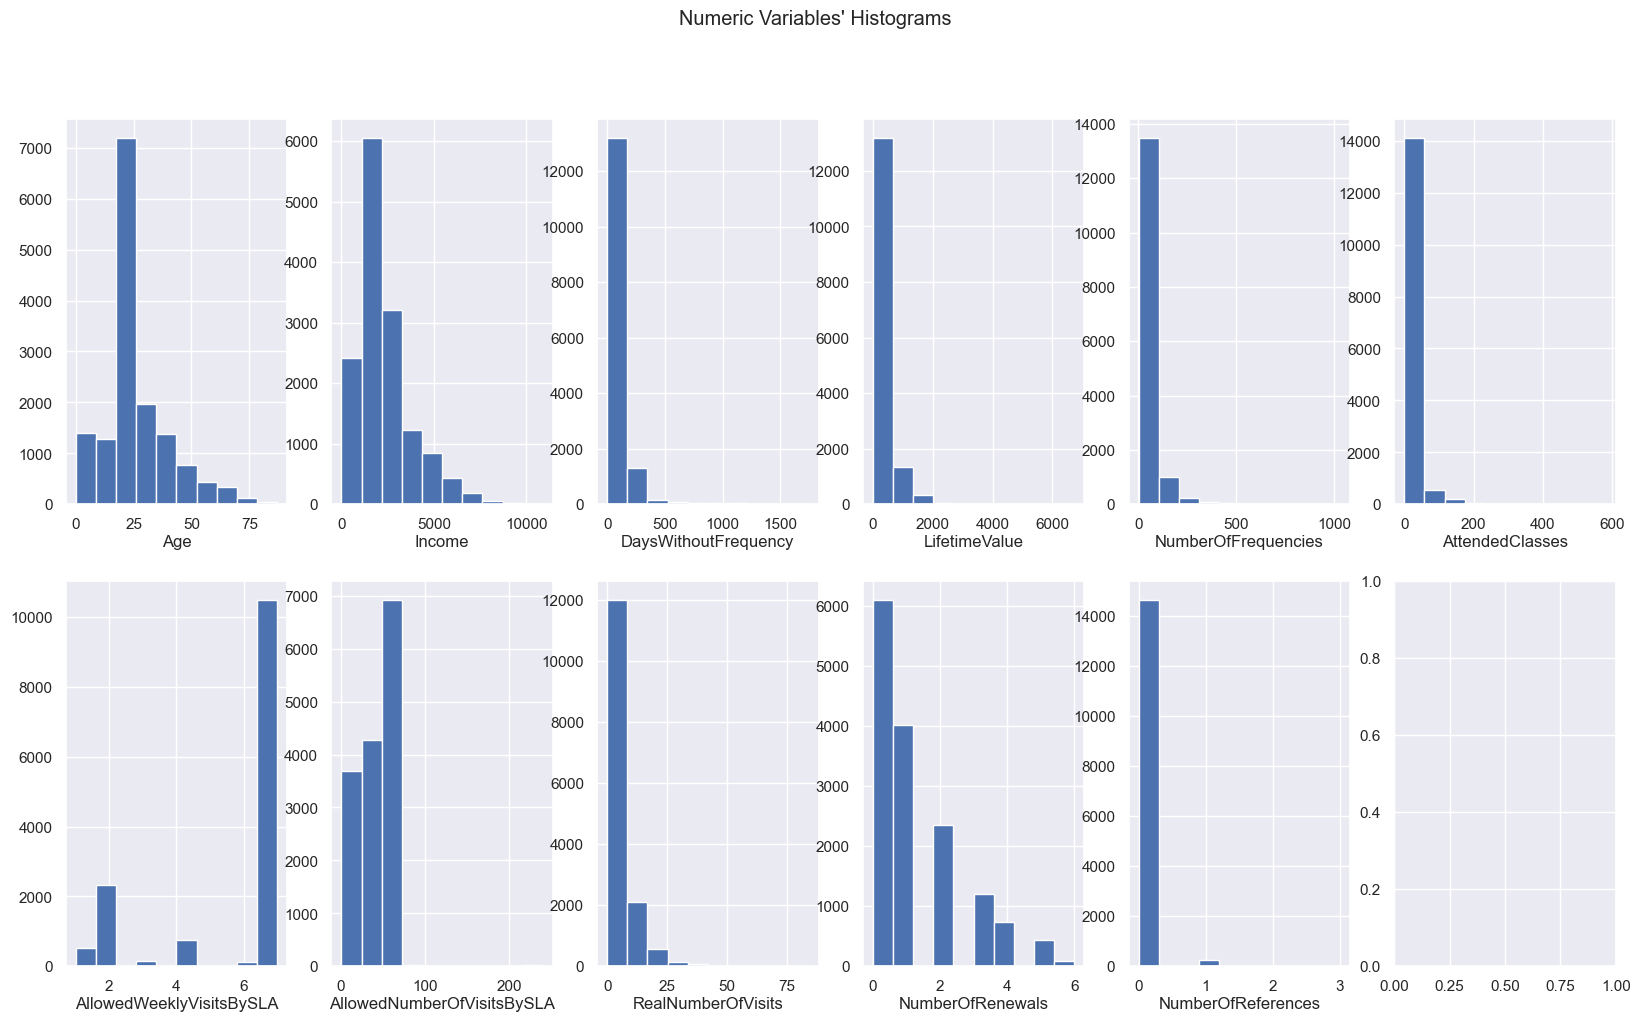

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUABI.TTF', name='Book Antiqua', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariali.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothL.ttc', name='Yu Gothic', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbelli.ttf', name='Corbel', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mvboli.ttf', name='MV Boli', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DUBAI-BOLD.TTF', name='Dubai', style='normal', variant='normal', weight=700,

findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='no

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOTHICI.TTF', name='Century Gothic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\framdit.ttf', name='Franklin Gothic Medium', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambria.ttc', name='Cambria', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segmdl2.ttf', name='Segoe MDL2 Assets', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constan.ttf', name='Constantia', style='normal', v

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\calibrili.ttf', name='Calibri', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SitkaZ.ttc', name='Sitka Small', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOOKOSB.TTF', name='Bookman Old Style', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LeelUIsl.ttf', name='Leelawadee UI', style='normal', variant='normal', weight=350, stretch='normal', size='scalable')) = 10.0975
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\taile.ttf', name='Microsoft Tai Le', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\javatext.ttf', name='Javanese Text', style='norma

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisym.ttf', name='Segoe UI Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdanaz.ttf', name='Verdana', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\comic.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoescb.ttf', name='Segoe Script', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LeelaUIb.ttf', name='Leelawadee UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebucit.ttf', name='Trebuchet MS', style='italic', 

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbell.ttf', name='Corbel', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\wingding.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constanb.ttf', name='Constantia', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\micross.ttf', name='Microsoft Sans Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambriai.ttf', name='Cambria', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARIALNB.TTF', name='Arial', style='normal', variant='normal'

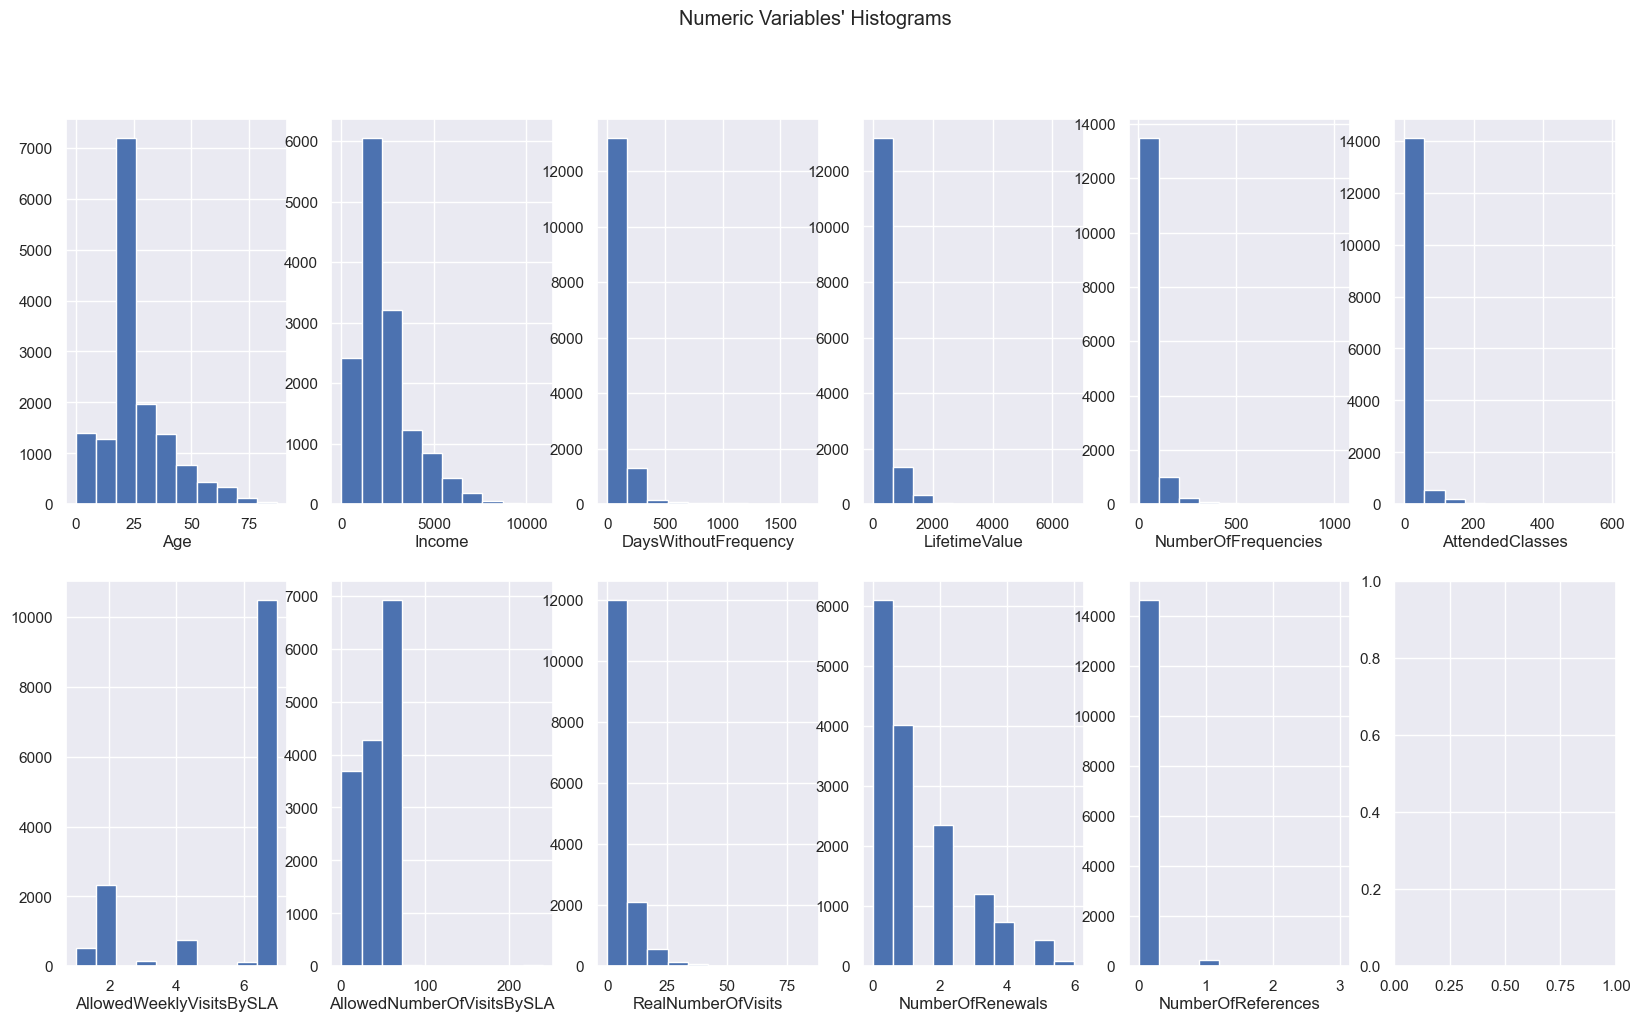

In [230]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))
    
plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

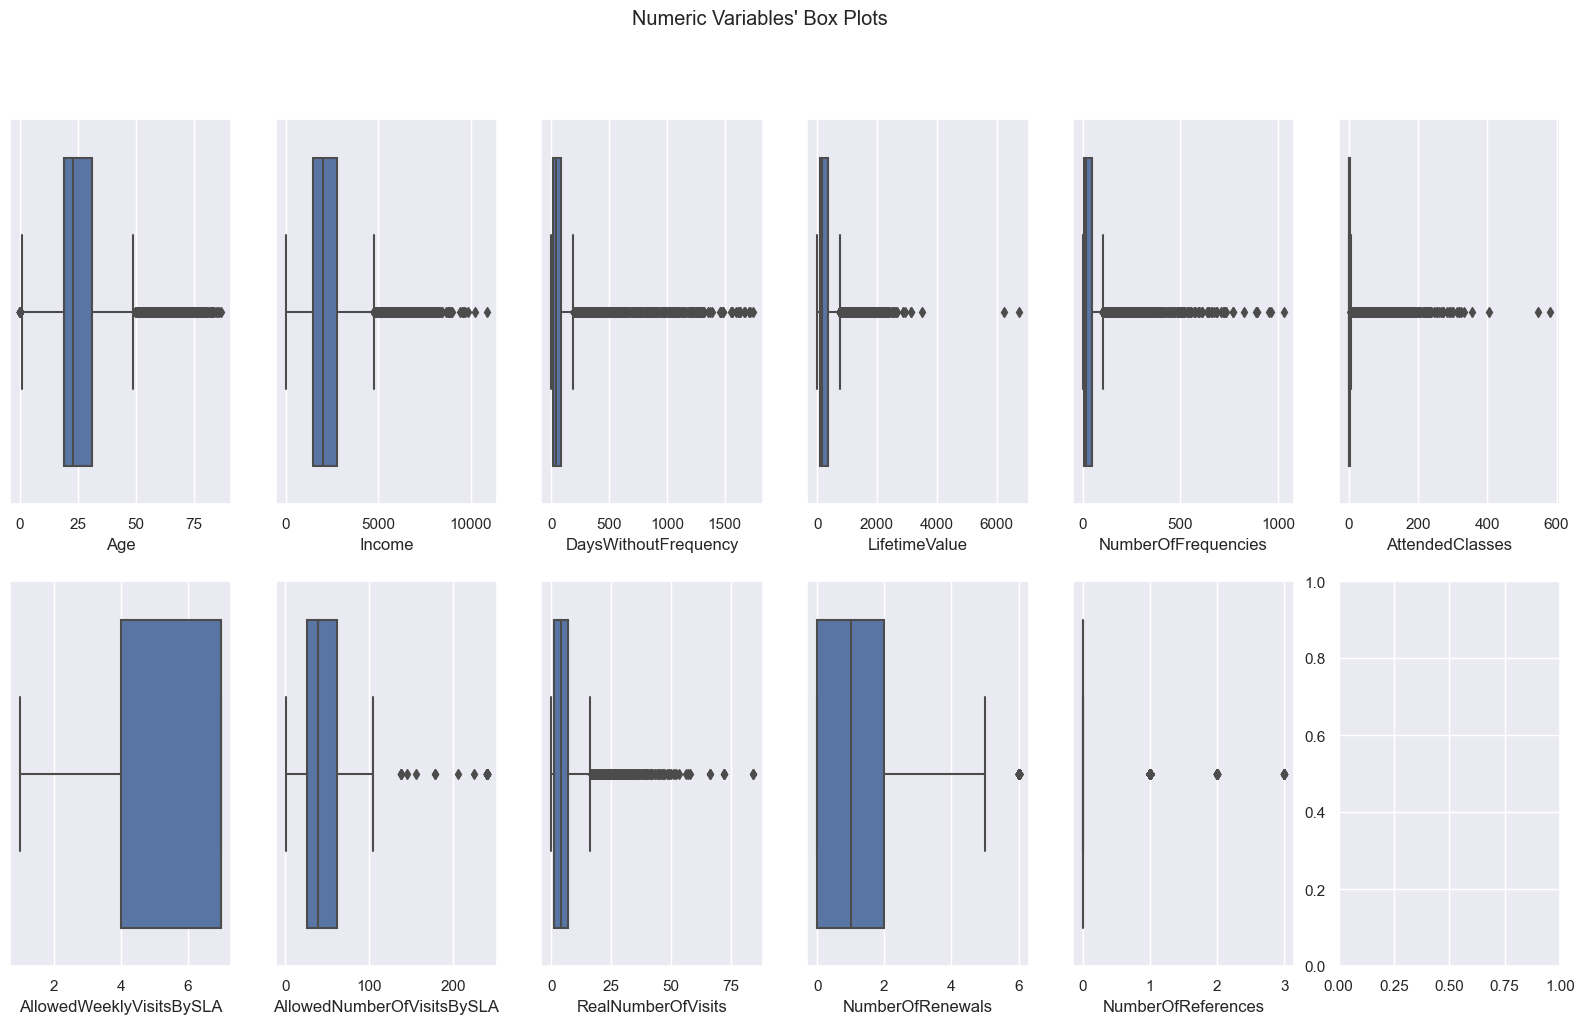

In [231]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

# Save the figure
if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))
    
plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'numeric_variables_boxplots.png'), dpi=200)

plt.show()

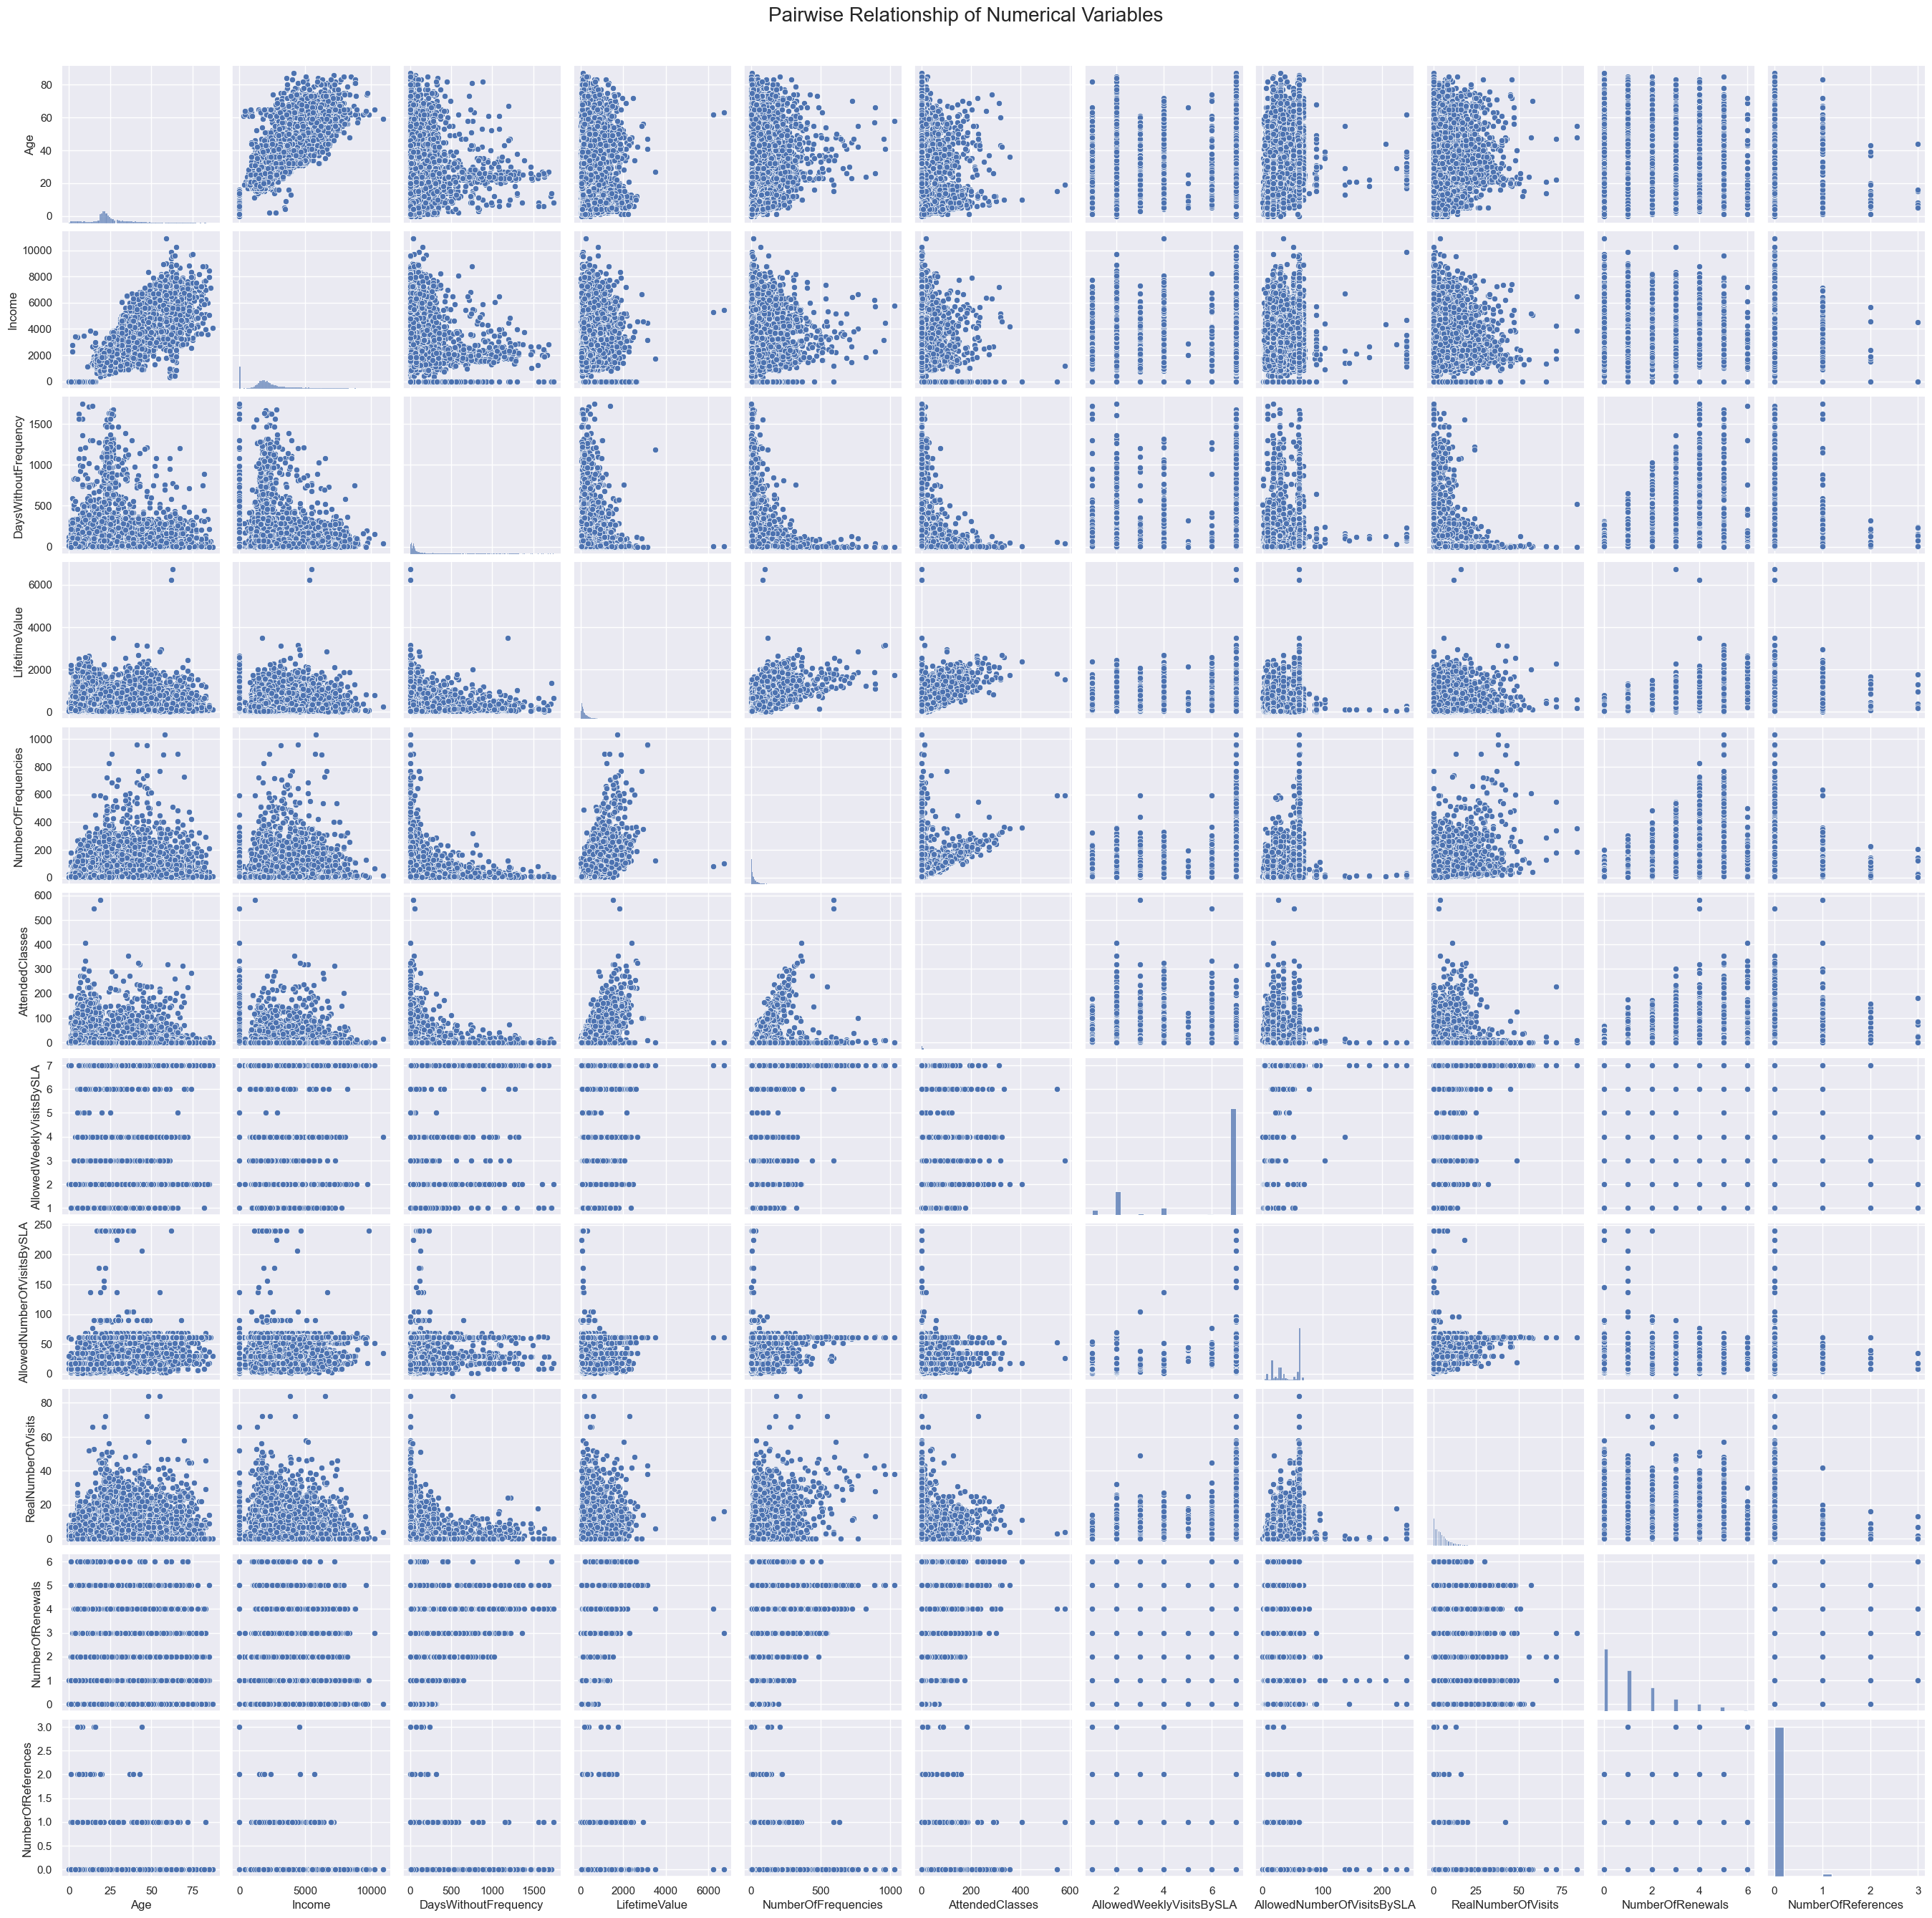

In [232]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))
    
plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

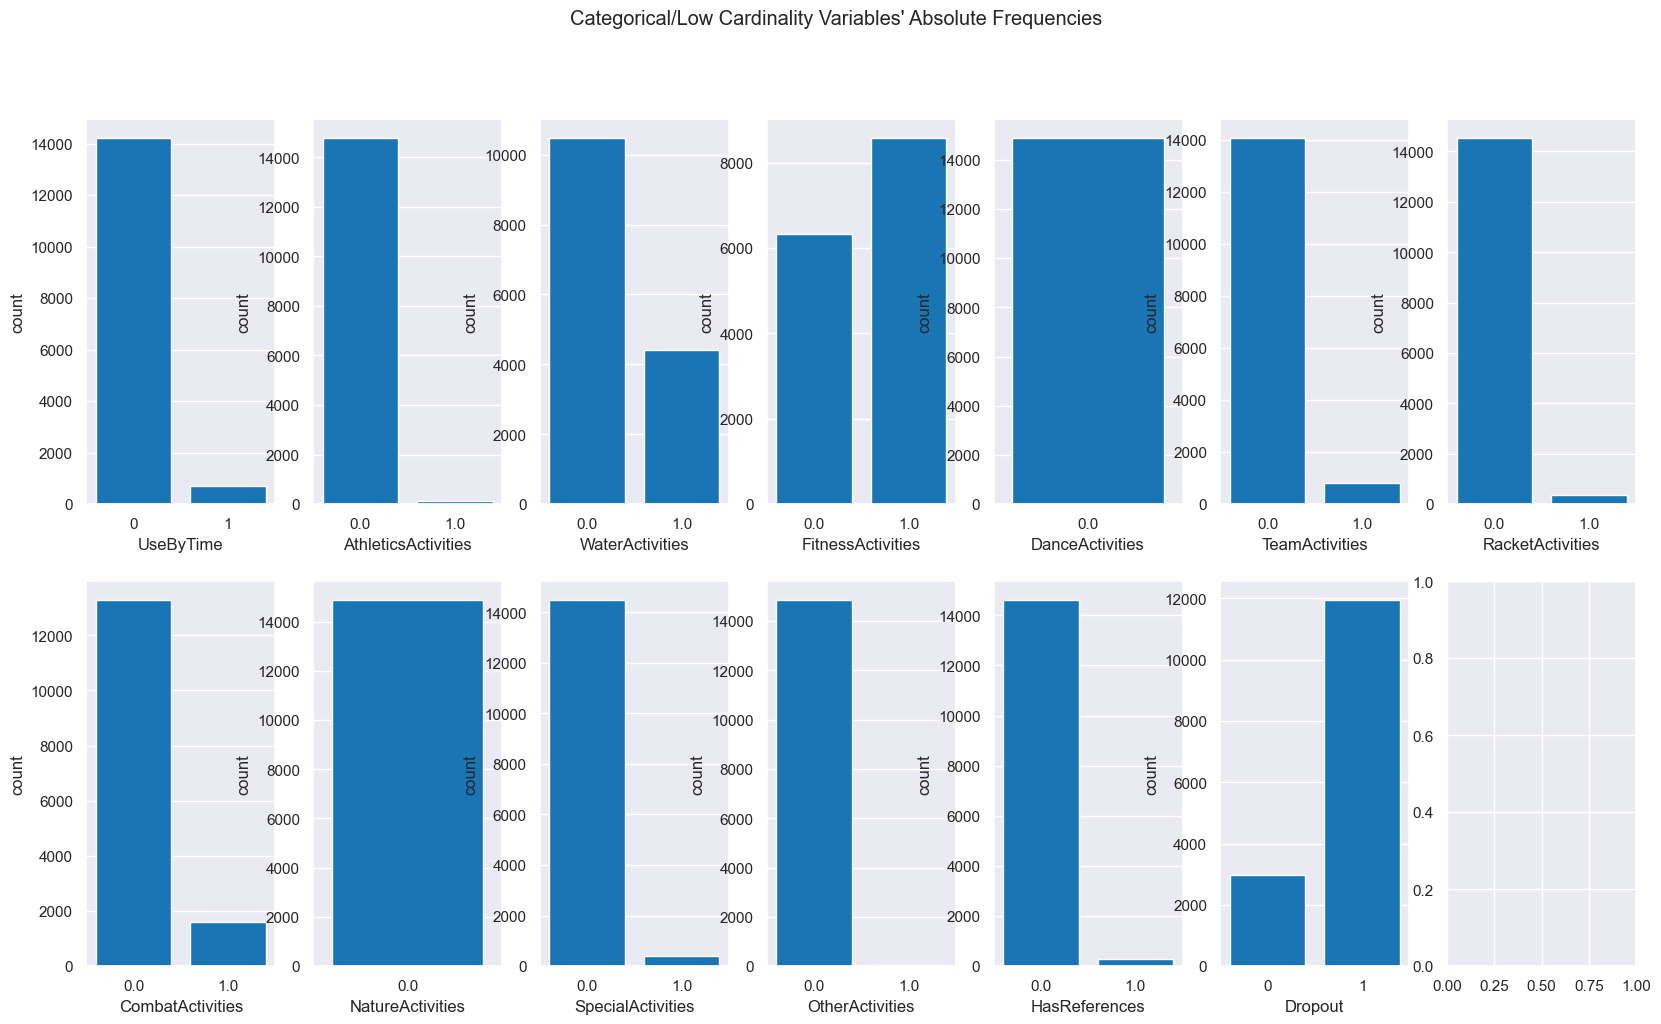

In [233]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_non_temporal) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_non_temporal): # Notice the zip() function and flatten() method
    sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'categorical_variables_frequecies.png'), dpi=200)
plt.show()

In [234]:
df['Age'].value_counts()

Age
22    1187
21    1166
20     987
23     954
19     899
      ... 
79       4
85       3
84       2
86       1
87       1
Name: count, Length: 88, dtype: int64

In [235]:
df['Gender'].value_counts()

Gender
Female    8930
Male      6011
Name: count, dtype: int64

In [236]:
df['Income'].value_counts()

Income
0.0       2122
1890.0      84
1820.0      82
1970.0      80
1710.0      79
          ... 
8160.0       1
6510.0       1
6770.0       1
7810.0       1
6570.0       1
Name: count, Length: 737, dtype: int64

<Axes: >

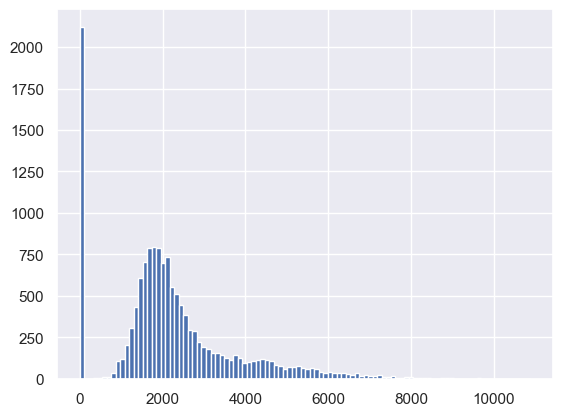

In [237]:
df['Income'].hist(bins=100)

<Axes: >

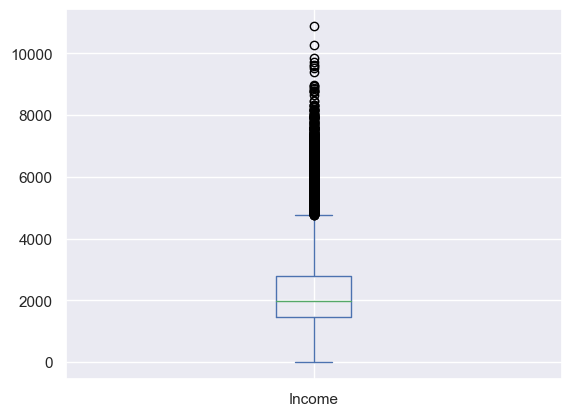

In [238]:
df['Income'].plot(kind='box')

In [239]:
df['EnrollmentStart'].value_counts()

EnrollmentStart
2015-03-02    92
2018-10-01    71
2014-09-29    69
2015-03-03    67
2016-03-01    62
              ..
2016-08-12     1
2018-06-21     1
2018-07-18     1
2017-07-14     1
2014-07-18     1
Name: count, Length: 1490, dtype: int64

In [240]:
df['EnrollmentFinish'].value_counts()

EnrollmentFinish
2015-09-16    1684
2016-07-31     890
2018-07-31     800
2019-10-31     735
2017-08-29     541
              ... 
2016-04-13       1
2017-12-29       1
2018-08-24       1
2019-05-16       1
2014-12-10       1
Name: count, Length: 1300, dtype: int64

In [241]:
df['LastPeriodStart'].value_counts()

LastPeriodStart
2019-07-01    3171
2016-01-01    1919
2018-01-01    1870
2019-01-01    1734
2015-01-01    1504
2017-01-01    1448
2018-07-01     838
2016-07-01     727
2015-07-01     674
2017-07-01     619
2014-07-01     432
2014-01-01       5
Name: count, dtype: int64

In [242]:
df['LastPeriodFinish'].value_counts()

LastPeriodFinish
2019-12-31    3693
2018-12-31    1748
2016-12-31    1722
2019-06-30    1501
2016-06-30    1197
2015-06-30    1017
2017-06-30     991
2018-06-30     987
2017-12-31     931
2015-12-31     853
2014-12-31     301
Name: count, dtype: int64

In [243]:
df['DateLastVisit'].value_counts()

DateLastVisit
2019-10-31    475
2019-10-30    438
2019-10-26    304
2019-10-29    278
2019-10-28    218
             ... 
2019-02-13      1
2014-12-13      1
2015-01-16      1
2016-01-09      1
2014-07-31      1
Name: count, Length: 1384, dtype: int64

In [244]:
df['DaysWithoutFrequency'].value_counts()

DaysWithoutFrequency
0       604
1       563
5       393
2       380
3       349
       ... 
392       1
709       1
474       1
1249      1
461       1
Name: count, Length: 660, dtype: int64

In [245]:
df['LifetimeValue'].value_counts()

LifetimeValue
43.60      188
53.60      146
47.20      129
37.60      124
83.60      118
          ... 
635.30       1
143.90       1
1061.25      1
275.90       1
919.60       1
Name: count, Length: 5668, dtype: int64

In [246]:
df['UseByTime'].value_counts()

UseByTime
0    14237
1      704
Name: count, dtype: int64

In [247]:
df['AthleticsActivities'].value_counts()

AthleticsActivities
0.0    14795
1.0      110
Name: count, dtype: int64

In [248]:
df['WaterActivities'].value_counts()

WaterActivities
0.0    10490
1.0     4414
Name: count, dtype: int64

In [249]:
df['FitnessActivities'].value_counts()

FitnessActivities
1.0    8587
0.0    6319
Name: count, dtype: int64

In [250]:
df['DanceActivities'].value_counts() 

DanceActivities
0.0    14905
Name: count, dtype: int64

In [251]:
df['TeamActivities'].value_counts()

TeamActivities
0.0    14078
1.0      828
Name: count, dtype: int64

In [252]:
df['RacketActivities'].value_counts()

RacketActivities
0.0    14555
1.0      349
Name: count, dtype: int64

In [253]:
df['CombatActivities'].value_counts()

CombatActivities
0.0    13299
1.0     1609
Name: count, dtype: int64

In [254]:
df['NatureActivities'].value_counts()

NatureActivities
0.0    14894
Name: count, dtype: int64

In [255]:
df['SpecialActivities'].value_counts()

SpecialActivities
0.0    14502
1.0      395
Name: count, dtype: int64

In [256]:
df['OtherActivities'].value_counts()

OtherActivities
0.0    14878
1.0       28
Name: count, dtype: int64

In [257]:
df['NumberOfFrequencies'].value_counts()

NumberOfFrequencies
2.0      661
3.0      623
1.0      609
4.0      583
5.0      556
        ... 
443.0      1
660.0      1
507.0      1
373.0      1
472.0      1
Name: count, Length: 415, dtype: int64

In [258]:
df['AttendedClasses'].value_counts()

AttendedClasses
0      10432
1        411
2        214
3        195
4        171
       ...  
268        1
312        1
139        1
290        1
202        1
Name: count, Length: 230, dtype: int64

In [259]:
df['AllowedWeeklyVisitsBySLA'].value_counts()

AllowedWeeklyVisitsBySLA
7.0    10505
2.0     2341
4.0      742
1.0      525
3.0      160
6.0      118
5.0       15
Name: count, dtype: int64

In [260]:
df['AllowedWeeklyVisitsBySLA'].value_counts()

AllowedWeeklyVisitsBySLA
7.0    10505
2.0     2341
4.0      742
1.0      525
3.0      160
6.0      118
5.0       15
Name: count, dtype: int64

In [261]:
df['AllowedNumberOfVisitsBySLA'].value_counts()

AllowedNumberOfVisitsBySLA
60.97    4462
17.42    1497
30.03    1205
28.98    1138
62.02     646
         ... 
32.58       1
0.86        1
53.57       1
17.15       1
15.87       1
Name: count, Length: 270, dtype: int64

In [262]:
df['RealNumberOfVisits'].value_counts()

RealNumberOfVisits
0     2698
1     1641
2     1635
3     1440
4     1323
5     1045
6      913
7      711
8      611
9      466
10     375
11     348
12     263
13     210
14     163
15     142
16     138
17     114
18      87
19      73
20      65
21      49
22      48
24      44
25      42
23      39
26      31
27      24
29      21
34      20
28      20
30      18
33      14
32      13
31      13
35       9
36       8
39       7
40       6
37       6
38       5
41       5
45       5
46       4
42       4
49       3
72       3
47       3
66       2
43       2
84       2
51       2
44       1
53       1
50       1
58       1
52       1
48       1
57       1
56       1
Name: count, dtype: int64

In [263]:
df['NumberOfRenewals'].value_counts()

NumberOfRenewals
0    6103
1    4019
2    2347
3    1209
4     733
5     444
6      86
Name: count, dtype: int64

In [264]:
df['HasReferences'].value_counts()

HasReferences
0.0    14632
1.0      297
Name: count, dtype: int64

In [265]:
df['NumberOfReferences'].value_counts() # check why there is difference on class 0 related to the 'HasReferences' column 
                                        # when it is 0 so no references

NumberOfReferences
0    14645
1      267
2       21
3        8
Name: count, dtype: int64

In [266]:
df['Dropout'].value_counts()

Dropout
1    11967
0     2974
Name: count, dtype: int64

In [267]:
# ProfileReport(df, title="Profile Report")

In [268]:
# profile = ProfileReport(df, title="Profile Report")
# profile.to_file(output_file="datamining_report.html")

In [269]:
# Alerts by the Profile Report 

# DanceActivities has constant value ""	Constant
# NatureActivities has constant value ""	Constant
# Age is highly overall correlated with Income and 2 other fields	High correlation
# Income is highly overall correlated with Age	High correlation
# DaysWithoutFrequency is highly overall correlated with RealNumberOfVisits	High correlation
# LifetimeValue is highly overall correlated with NumberOfFrequencies and 1 other fields	High correlation
# NumberOfFrequencies is highly overall correlated with LifetimeValue and 1 other fields	High correlation
# AttendedClasses is highly overall correlated with AllowedWeeklyVisitsBySLA and 1 other fields	High correlation
# AllowedWeeklyVisitsBySLA is highly overall correlated with AttendedClasses and 3 other fields	High correlation
# AllowedNumberOfVisitsBySLA is highly overall correlated with AttendedClasses and 1 other fields	High correlation
# RealNumberOfVisits is highly overall correlated with DaysWithoutFrequency	High correlation
# NumberOfRenewals is highly overall correlated with LifetimeValue and 1 other fields	High correlation
# LastPeriodStart is highly overall correlated with LastPeriodFinish and 1 other fields	High correlation
# LastPeriodFinish is highly overall correlated with LastPeriodStart and 1 other fields	High correlation
# WaterActivities is highly overall correlated with Age and 2 other fields	High correlation
# FitnessActivities is highly overall correlated with Age and 2 other fields	High correlation
# HasReferences is highly overall correlated with NumberOfReferences	High correlation
# NumberOfReferences is highly overall correlated with HasReferences	High correlation
# Dropout is highly overall correlated with LastPeriodStart and 1 other fields	High correlation
# UseByTime is highly imbalanced (72.6%)	Imbalance
# AthleticsActivities is highly imbalanced (93.7%)	Imbalance
# TeamActivities is highly imbalanced (69.1%)	Imbalance
# RacketActivities is highly imbalanced (84.0%)	Imbalance
# CombatActivities is highly imbalanced (50.6%)	Imbalance
# SpecialActivities is highly imbalanced (82.3%)	Imbalance
# OtherActivities is highly imbalanced (98.0%)	Imbalance
# HasReferences is highly imbalanced (85.9%)	Imbalance
# NumberOfReferences is highly imbalanced (92.4%)	Imbalance
# Income has 495 (3.3%) missing values	Missing
# AllowedWeeklyVisitsBySLA has 535 (3.6%) missing values	Missing
# ID is uniformly distributed	Uniform
# ID has unique values	Unique
# Income has 2123 (14.2%) zeros	Zeros
# DaysWithoutFrequency has 604 (4.0%) zeros	Zeros
# AttendedClasses has 10432 (69.8%) zeros	Zeros
# RealNumberOfVisits has 2698 (18.1%) zeros	Zeros
# NumberOfRenewals has 6103 (40.8%) zeros	Zeros

In [270]:
pd.set_option('display.max_columns', None)
df.head()

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10000   60  Female  5500.0      2019-09-03       2019-10-31      2019-07-01   
10001   29  Female  2630.0      2014-08-12       2015-09-14      2015-01-01   
10002   23    Male  1980.0      2017-05-02       2017-06-01      2017-01-01   
10003    9    Male     0.0      2018-09-05       2019-02-12      2018-07-01   
10004   35    Male  4320.0      2016-04-20       2018-06-07      2018-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10000       2019-12-31    2019-10-30                     1          89.35   
10001       2015-12-31    2015-07-16                    60         479.20   
10002       2017-06-30    2017-05-25                     7          37.60   
10003       2019-06-30    2019-01-21                    22         155.40   
10004       2018-06-30    2017-11-09                   210         373.20   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
10000          0                  0.0              0.0                1.0   
10001          0                  0.0              0.0                0.0   
10002          0                  0.0              0.0                1.0   
10003          0                  0.0              0.0                0.0   
10004          0                  0.0              0.0                1.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
10000              0.0             0.0               0.0               0.0   
10001              0.0             0.0               0.0               0.0   
10002              0.0             0.0               0.0               0.0   
10003              0.0             1.0               0.0               0.0   
10004              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
10000               0.0                0.0              0.0   
10001               0.0                1.0              0.0   
10002               0.0                0.0              0.0   
10003               0.0                0.0              0.0   
10004               0.0                0.0              NaN   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10000                  9.0                7                       NaN   
10001                 23.0                1                       2.0   
10002                  6.0                0                       7.0   
10003                 20.0                2                       2.0   
10004                 41.0                0                       7.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10000                        6.28                   2                 0   
10001                       17.42                   1                 2   
10002                       30.03                   6                 0   
10003                       17.72                   3                 0   
10004                       60.97                   0                 3   

       HasReferences  NumberOfReferences  Dropout  
ID                                                 
10000            0.0                   0        0  
10001            0.0                   0        1  
10002            0.0                   0        1  
10003            0.0                   0        1  
10004            0.0              

In [271]:
df.groupby('Gender')['Income'].agg({'min','max','mean','median'})

max  median         mean  min
Gender                                   
Female  10890.0  1990.0  2260.524552  0.0
Male     9630.0  2000.0  2186.800207  0.0

## Data Cleaning

Max removal of Outliers is 3%

In [272]:
# Missing values in Activities -> Person did not participate on them
# Missing values in NumberofFrequencies -> Person did not come yet to the gym

In [273]:
columns_to_fill = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities','DanceActivities', 'TeamActivities', 'RacketActivities',
'CombatActivities', 'NatureActivities', 'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies']
df[columns_to_fill] = df[columns_to_fill].apply(lambda col: col.fillna(0))

We are dropping DanceActivities & NatureActivities because they have no values

In [274]:
df.drop(['DanceActivities','NatureActivities'], axis=1, inplace=True)

In [275]:
df['TotalActivities'] = df[['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities',
'CombatActivities', 'SpecialActivities', 'OtherActivities']].sum(axis=1)

In [276]:
df['TotalActivities'].value_counts()

TotalActivities
1.0    13606
2.0     1187
3.0       98
0.0       39
4.0        9
5.0        2
Name: count, dtype: int64

In [277]:
columns = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities',
'CombatActivities', 'SpecialActivities', 'OtherActivities', 'Dropout', 'UseByTime']

In [278]:
for col in columns:
    df[col] = df[col].astype(bool)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14941 entries, 10000 to 24941
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14941 non-null  int64  
 1   Gender                      14941 non-null  object 
 2   Income                      14446 non-null  float64
 3   EnrollmentStart             14941 non-null  object 
 4   EnrollmentFinish            14941 non-null  object 
 5   LastPeriodStart             14941 non-null  object 
 6   LastPeriodFinish            14941 non-null  object 
 7   DateLastVisit               14941 non-null  object 
 8   DaysWithoutFrequency        14941 non-null  int64  
 9   LifetimeValue               14941 non-null  float64
 10  UseByTime                   14941 non-null  bool   
 11  AthleticsActivities         14941 non-null  bool   
 12  WaterActivities             14941 non-null  bool   
 13  FitnessActivities           1494

<Axes: >

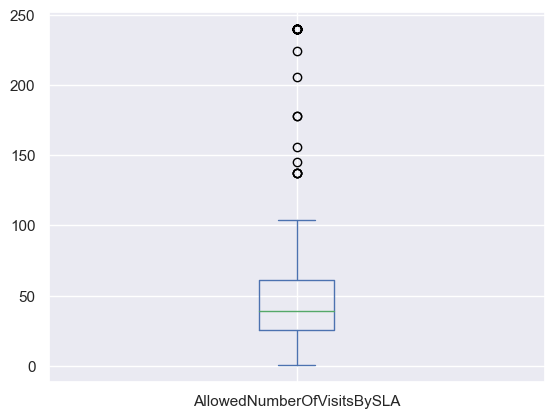

In [280]:
df['AllowedNumberOfVisitsBySLA'].plot(kind='box')

In [281]:
df['AllowedNumberOfVisitsBySLA'].describe()

count    14941.000000
mean        41.636121
std         21.066860
min          0.560000
25%         25.720000
50%         38.990000
75%         60.970000
max        240.030000
Name: AllowedNumberOfVisitsBySLA, dtype: float64

In [282]:
df[df['AllowedNumberOfVisitsBySLA']>120]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
11158   26    Male  1990.0      2015-03-17       2015-09-16      2015-01-01   
11998   17    Male  1130.0      2015-02-28       2015-09-16      2015-01-01   
12203   22  Female  2640.0      2015-03-09       2015-09-16      2015-01-01   
12328   36  Female  2770.0      2015-03-05       2015-09-16      2015-01-01   
12943   27    Male  1760.0      2014-06-18       2015-09-16      2015-01-01   
12980   32    Male  1980.0      2015-05-16       2015-09-16      2015-01-01   
13090   19  Female  1400.0      2015-03-04       2015-09-16      2015-01-01   
13177   28    Male  2760.0      2015-04-01       2015-09-16      2015-01-01   
13673   30  Female  3540.0      2015-03-03       2015-09-16      2015-01-01   
14061   62  Female  9840.0      2015-04-27       2015-09-16      2015-01-01   
14363   55  Female  6670.0      2015-02-17       2015-09-16      2015-01-01   
15565   29  Female  2320.0      2015-04-06       2015-09-16      2015-01-01   
16161   38    Male  2600.0      2015-03-31       2015-09-16      2015-01-01   
16359   13  Female     0.0      2015-03-07       2015-09-16      2015-01-01   
16429   21  Female  1420.0      2015-04-21       2015-07-31      2015-01-01   
16488   20  Female  1930.0      2015-04-21       2015-07-31      2015-01-01   
17234   19  Female  2210.0      2015-03-11       2015-09-16      2015-01-01   
18581   20    Male  1910.0      2015-03-02       2015-09-16      2015-01-01   
19625   39  Female  4660.0      2014-10-13       2015-09-16      2015-01-01   
19722   24  Female  1470.0      2015-03-12       2015-09-16      2015-01-01   
19759   18  Female  1830.0      2015-03-16       2015-09-16      2015-01-01   
20426   24  Female  3090.0      2015-03-26       2015-09-16      2015-01-01   
20610   23  Female  1720.0      2015-03-03       2015-09-16      2015-01-01   
21006   22  Female  2680.0      2015-03-12       2015-09-16      2015-01-01   
22731   22    Male  2210.0      2015-03-09       2015-09-16      2015-01-01   
23575   44  Female  4360.0      2015-04-09       2015-09-16      2015-01-01   
24323   22    Male  1120.0      2015-03-12       2015-09-16      2015-01-01   
24498   21  Female  2110.0      2015-02-27       2015-09-16      2015-01-01   
24722   29    Male  2820.0      2015-11-04       2016-01-04      2015-07-01   
24814   22    Male  2050.0      2015-03-02       2015-09-16      2015-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
11158       2016-06-30    2015-06-02                   106         181.60   
11998       2016-06-30    2015-06-17                    91         165.10   
12203       2015-12-31    2015-05-11                   128         112.60   
12328       2016-06-30    2015-06-27                    81         178.60   
12943       2016-06-30    2015-05-12                   127         160.60   
12980       2016-06-30    2015-05-19                   120          53.10   
13090       2016-06-30    2015-04-07                   162         118.27   
13177       2016-06-30    2015-04-29                   140         152.10   
13673       2016-06-30    2015-06-23                    85         178.60   
14061       2016-06-30    2015-06-04                   104          94.80   
14363       2016-06-30    2015-05-06                   133         123.10   
15565       2016-06-30    2015-05-08                   131         111.10   
16161       2016-06-30    2015-05-20                   119         105.60   
16359       2016-06-30    2015-06-08                   100         133.60   
16429       2015-12-31    2015-05-21                    71         108.60   
16488       2016-06-30    2015-05-21                    71          73.60   
17234       2016-06-30    2015-05-28                   111         109.60   
18581       201

In [283]:
df[df['Income'].isna()]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10068   43  Female     NaN      2016-09-16       2019-10-31      2019-07-01   
10076    9    Male     NaN      2017-09-16       2017-09-16      2019-07-01   
10156   37  Female     NaN      2016-03-16       2016-04-01      2016-01-01   
10158   64  Female     NaN      2015-10-12       2016-04-20      2016-01-01   
10224    7    Male     NaN      2016-04-20       2018-11-11      2018-07-01   
...    ...     ...     ...             ...              ...             ...   
24804    4  Female     NaN      2016-03-05       2016-03-05      2019-07-01   
24836    5    Male     NaN      2018-07-02       2018-07-02      2019-07-01   
24874   15    Male     NaN      2015-11-02       2016-07-31      2016-01-01   
24930    4    Male     NaN      2017-06-30       2017-11-07      2017-07-01   
24938   39    Male     NaN      2015-09-17       2016-06-04      2016-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10068       2019-12-31    2019-10-30                     1         849.80   
10076       2019-12-31    2019-10-26                     5         708.20   
10156       2016-06-30    2016-03-21                    11          41.60   
10158       2016-06-30    2016-01-23                    88         185.60   
10224       2018-12-31    2018-10-25                    17         836.60   
...                ...           ...                   ...            ...   
24804       2019-12-31    2019-10-26                     5        1656.30   
24836       2019-12-31    2019-10-30                     1         654.60   
24874       2016-12-31    2016-05-30                    62         353.60   
24930       2017-12-31    2017-09-30                    38          77.60   
24938       2016-06-30    2016-04-27                    38         343.85   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
10068       True                False            False               True   
10076      False                False             True              False   
10156      False                False             True              False   
10158      False                False            False              False   
10224      False                False             True              False   
...          ...                  ...              ...                ...   
24804      False                False             True              False   
24836      False                False             True              False   
24874      False                False            False              False   
24930      False                False             True              False   
24938      False                False            False              False   

       TeamActivities  RacketActivities  CombatActivities  SpecialActivities  \
ID                                                                             
10068           False             False             False              False   
10076           False             False             False              False   
10156           False             False             False              False   
10158           False             False             False               True   
10224            True             False             False              False   
...               ...               ...               ...                ...   
24804           False             False             False              False   
24836           False             False             False              False   
24874           False              True             False              False   
24930           False             False             False              False   
24938          

When the Age is 16 or below the Income is 0

In [284]:
df[df['Age']<=16]['Income'].describe()

count    2160.000000
mean       34.009259
std       278.332792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3870.000000
Name: Income, dtype: float64

In [285]:
younger_16 = df[df['Age']<=16]['Income']
younger_16

ID
10003    0.0
10009    0.0
10013    0.0
10025    0.0
10031    0.0
        ... 
24913    0.0
24917    0.0
24919    0.0
24930    NaN
24937    0.0
Name: Income, Length: 2523, dtype: float64

In [286]:
(younger_16[younger_16==0].count()*100)/younger_16.shape[0]

84.10622275069362

As you can see the vast majority (84%) and also the median and the third quartile are equal to zero so in the next step we fill
the values of NaN's of people younger or equal to 16 with 0.

In [287]:
df[df['Age']<=16]['Income'].isna().sum()

363

In [288]:
df.loc[df['Age']<=16, 'Income'] = df.loc[df['Age']<=16, 'Income'].fillna(0)

In [289]:
df[df['Age']<=16]['Income'].isna().sum()

0

In [290]:
df['Income'].isna().sum()

132

So, after filling the NaN's of Income that are <= 16 of Age, we then have 132 missing values left. 

In [291]:
df[df['Age']>16]['Income'].median()

2150.0

In [292]:
df[(df['Age']>16)&(df['Income'].isna())]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10068   43  Female     NaN      2016-09-16       2019-10-31      2019-07-01   
10156   37  Female     NaN      2016-03-16       2016-04-01      2016-01-01   
10158   64  Female     NaN      2015-10-12       2016-04-20      2016-01-01   
10259   35  Female     NaN      2015-09-25       2016-04-04      2016-01-01   
10315   22  Female     NaN      2018-04-17       2019-07-09      2019-01-01   
...    ...     ...     ...             ...              ...             ...   
24424   19  Female     NaN      2015-03-11       2015-09-16      2015-01-01   
24431   21  Female     NaN      2015-05-13       2015-09-16      2015-01-01   
24574   21    Male     NaN      2017-01-25       2017-02-24      2017-01-01   
24759   20  Female     NaN      2019-10-07       2019-10-31      2019-07-01   
24938   39    Male     NaN      2015-09-17       2016-06-04      2016-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10068       2019-12-31    2019-10-30                     1         849.80   
10156       2016-06-30    2016-03-21                    11          41.60   
10158       2016-06-30    2016-01-23                    88         185.60   
10259       2016-06-30    2015-10-06                   181         281.60   
10315       2019-12-31    2019-06-24                    15          98.50   
...                ...           ...                   ...            ...   
24424       2015-12-31    2015-04-27                   142          88.60   
24431       2015-12-31    2015-07-10                    68          62.85   
24574       2017-06-30    2017-02-07                    17          50.00   
24759       2019-12-31    2019-10-17                    14          50.70   
24938       2016-06-30    2016-04-27                    38         343.85   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
10068       True                False            False               True   
10156      False                False             True              False   
10158      False                False            False              False   
10259      False                False            False               True   
10315      False                False            False               True   
...          ...                  ...              ...                ...   
24424      False                False            False              False   
24431      False                False            False               True   
24574      False                False            False               True   
24759      False                False            False               True   
24938      False                False            False              False   

       TeamActivities  RacketActivities  CombatActivities  SpecialActivities  \
ID                                                                             
10068           False             False             False              False   
10156           False             False             False              False   
10158           False             False             False               True   
10259           False              True             False              False   
10315           False             False             False              False   
...               ...               ...               ...                ...   
24424           False              True             False              False   
24431           False             False             False              False   
24574           False             False             False              False   
24759           False             False             False              False   
24938          

We then filled the rest of Income NaN´s (Age > 16) with the median of Income when Age > 16

In [293]:
df.loc[(df['Age']>16)&(df['Income'].isna()), 'Income'] = df.loc[(df['Age']>16)&(df['Income'].isna()), 'Income'].fillna(df[df['Age']>16]['Income'].median())

In [294]:
df['Income'].isna().sum()

0

In [295]:
df['AllowedWeeklyVisitsBySLA'].isna().sum()

535

In [296]:
(df['AllowedWeeklyVisitsBySLA'].isna().sum())/df.shape[0]

0.03580750953751422

In [297]:
    df['AllowedWeeklyVisitsBySLA'].value_counts()

AllowedWeeklyVisitsBySLA
7.0    10505
2.0     2341
4.0      742
1.0      525
3.0      160
6.0      118
5.0       15
Name: count, dtype: int64

In [298]:
# We are going to fill the missing values with 0 because we think this are the cases where people are not allowed to go to the 
# gym because they dont have a subscription

In [299]:
df['AllowedWeeklyVisitsBySLA'] = df['AllowedWeeklyVisitsBySLA'].fillna(0)

In [300]:
df['HasReferences'].isna().sum()

12

In [301]:
df['HasReferences'].value_counts()

HasReferences
0.0    14632
1.0      297
Name: count, dtype: int64

In [302]:
# We are going to fill HasReferences with 0 because we think this are cases where the gym simply did not put in the database
# that those clients do not have a reference (by human error, forgetting) and also the class 0 is the majority class (mode).

In [303]:
df['HasReferences'] = df['HasReferences'].fillna(0)

In [304]:
metric_features.append('TotalActivities')

In [305]:
df['Days_between'] = (pd.to_datetime(df['EnrollmentFinish'])-pd.to_datetime(df['EnrollmentStart'])).dt.days

In [306]:
metric_features.append('Days_between')

In [307]:
df['Days_between']

ID
10000      58
10001     398
10002      30
10003     160
10004     778
         ... 
24937       0
24938     261
24939      30
24940       0
24941    1166
Name: Days_between, Length: 14941, dtype: int64

<Axes: xlabel='Age', ylabel='Income'>

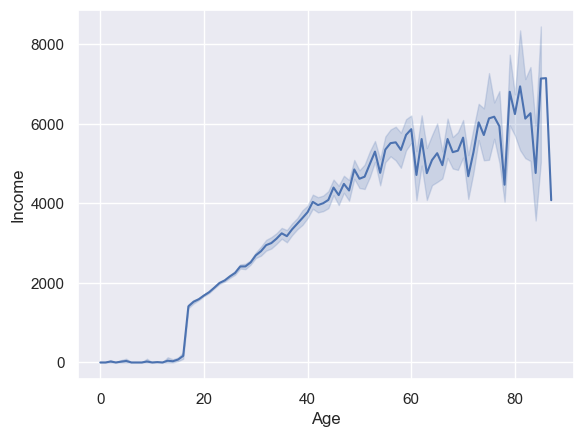

In [308]:
sns.lineplot(data=df, x="Age", y="Income")

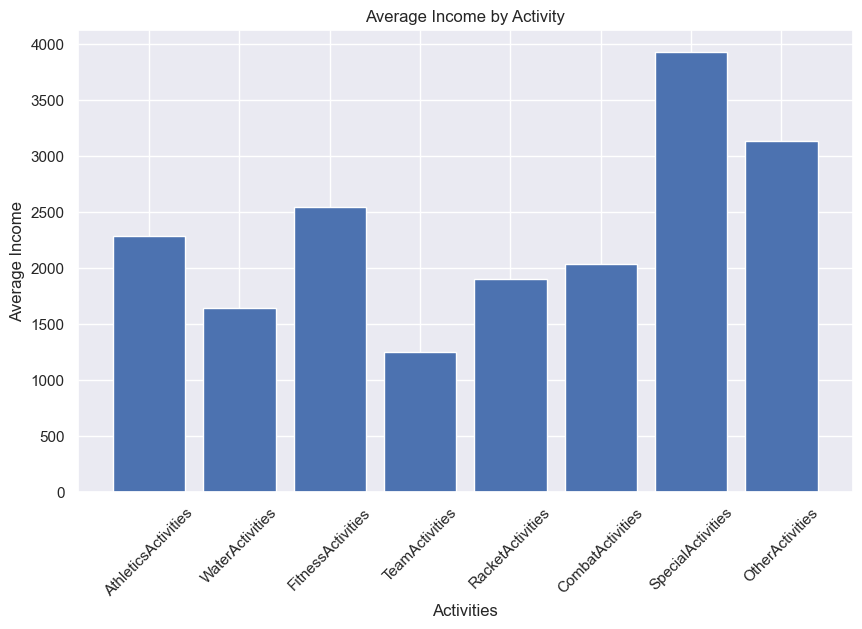

In [309]:
activities = ['AthleticsActivities', 'WaterActivities',
              'FitnessActivities', 'TeamActivities',
              'RacketActivities', 'CombatActivities',
              'SpecialActivities', 'OtherActivities']

# Calculate the mean income for each activity
mean_incomes = [df[df[activity] == True]['Income'].mean() for activity in activities]

plt.figure(figsize=(10, 6))
plt.bar(activities, mean_incomes)
plt.xlabel('Activities')
plt.ylabel('Average Income')
plt.title('Average Income by Activity')
plt.xticks(rotation=45)
plt.show()

In [310]:
df['Gender'].value_counts()

Gender
Female    8930
Male      6011
Name: count, dtype: int64

In [311]:
df['OtherActivities'].value_counts()

OtherActivities
False    14913
True        28
Name: count, dtype: int64

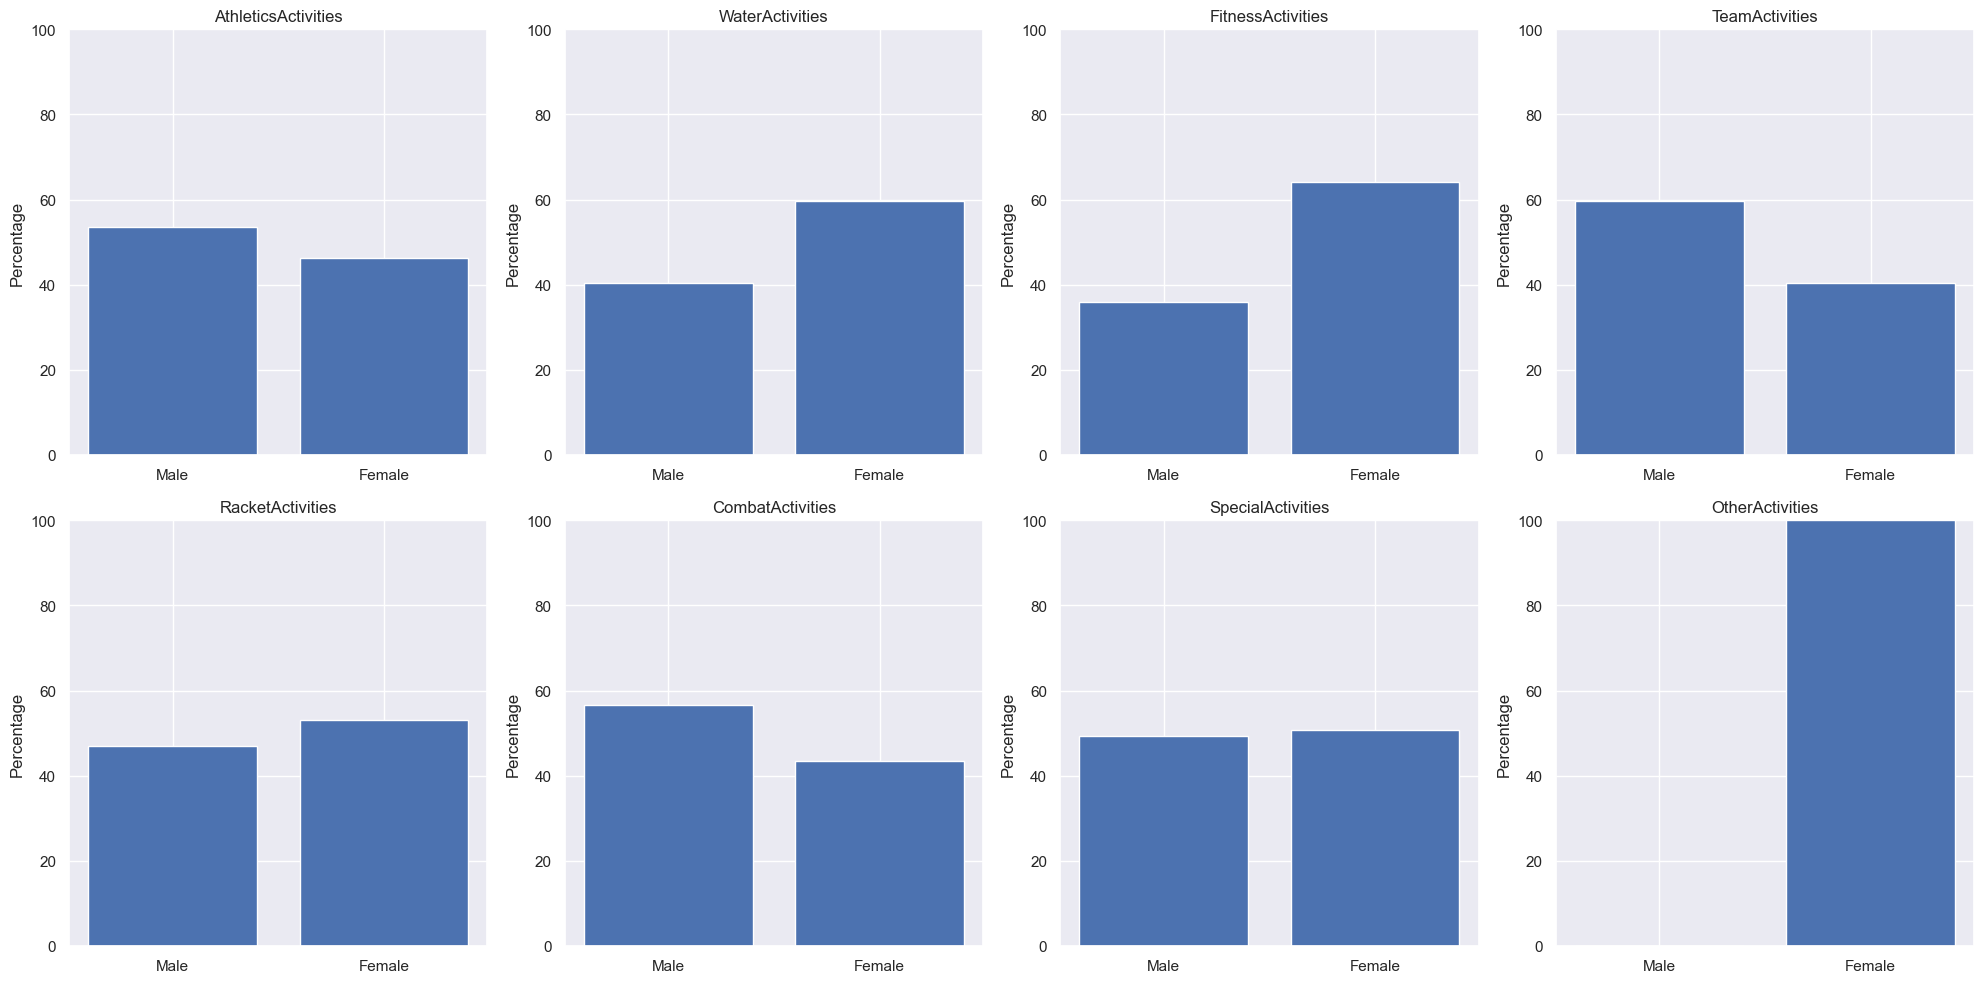

In [312]:
genders = ['Male', 'Female']

fig, axs = plt.subplots(len(activities) // 4, 4, figsize=(20, 10))

for i, activity in enumerate(activities):
    ax = axs[i // 4, i % 4]
    gender_counts = df[df[activity] == True]['Gender'].value_counts(normalize=True) * 100
    gender_counts = gender_counts.reindex(genders, fill_value=0)
    ax.bar(genders, gender_counts)
    ax.set_ylim([0, 100])
    ax.set_title(activity)
    ax.set_ylabel('Percentage')

plt.tight_layout()
plt.show()

## Outliers

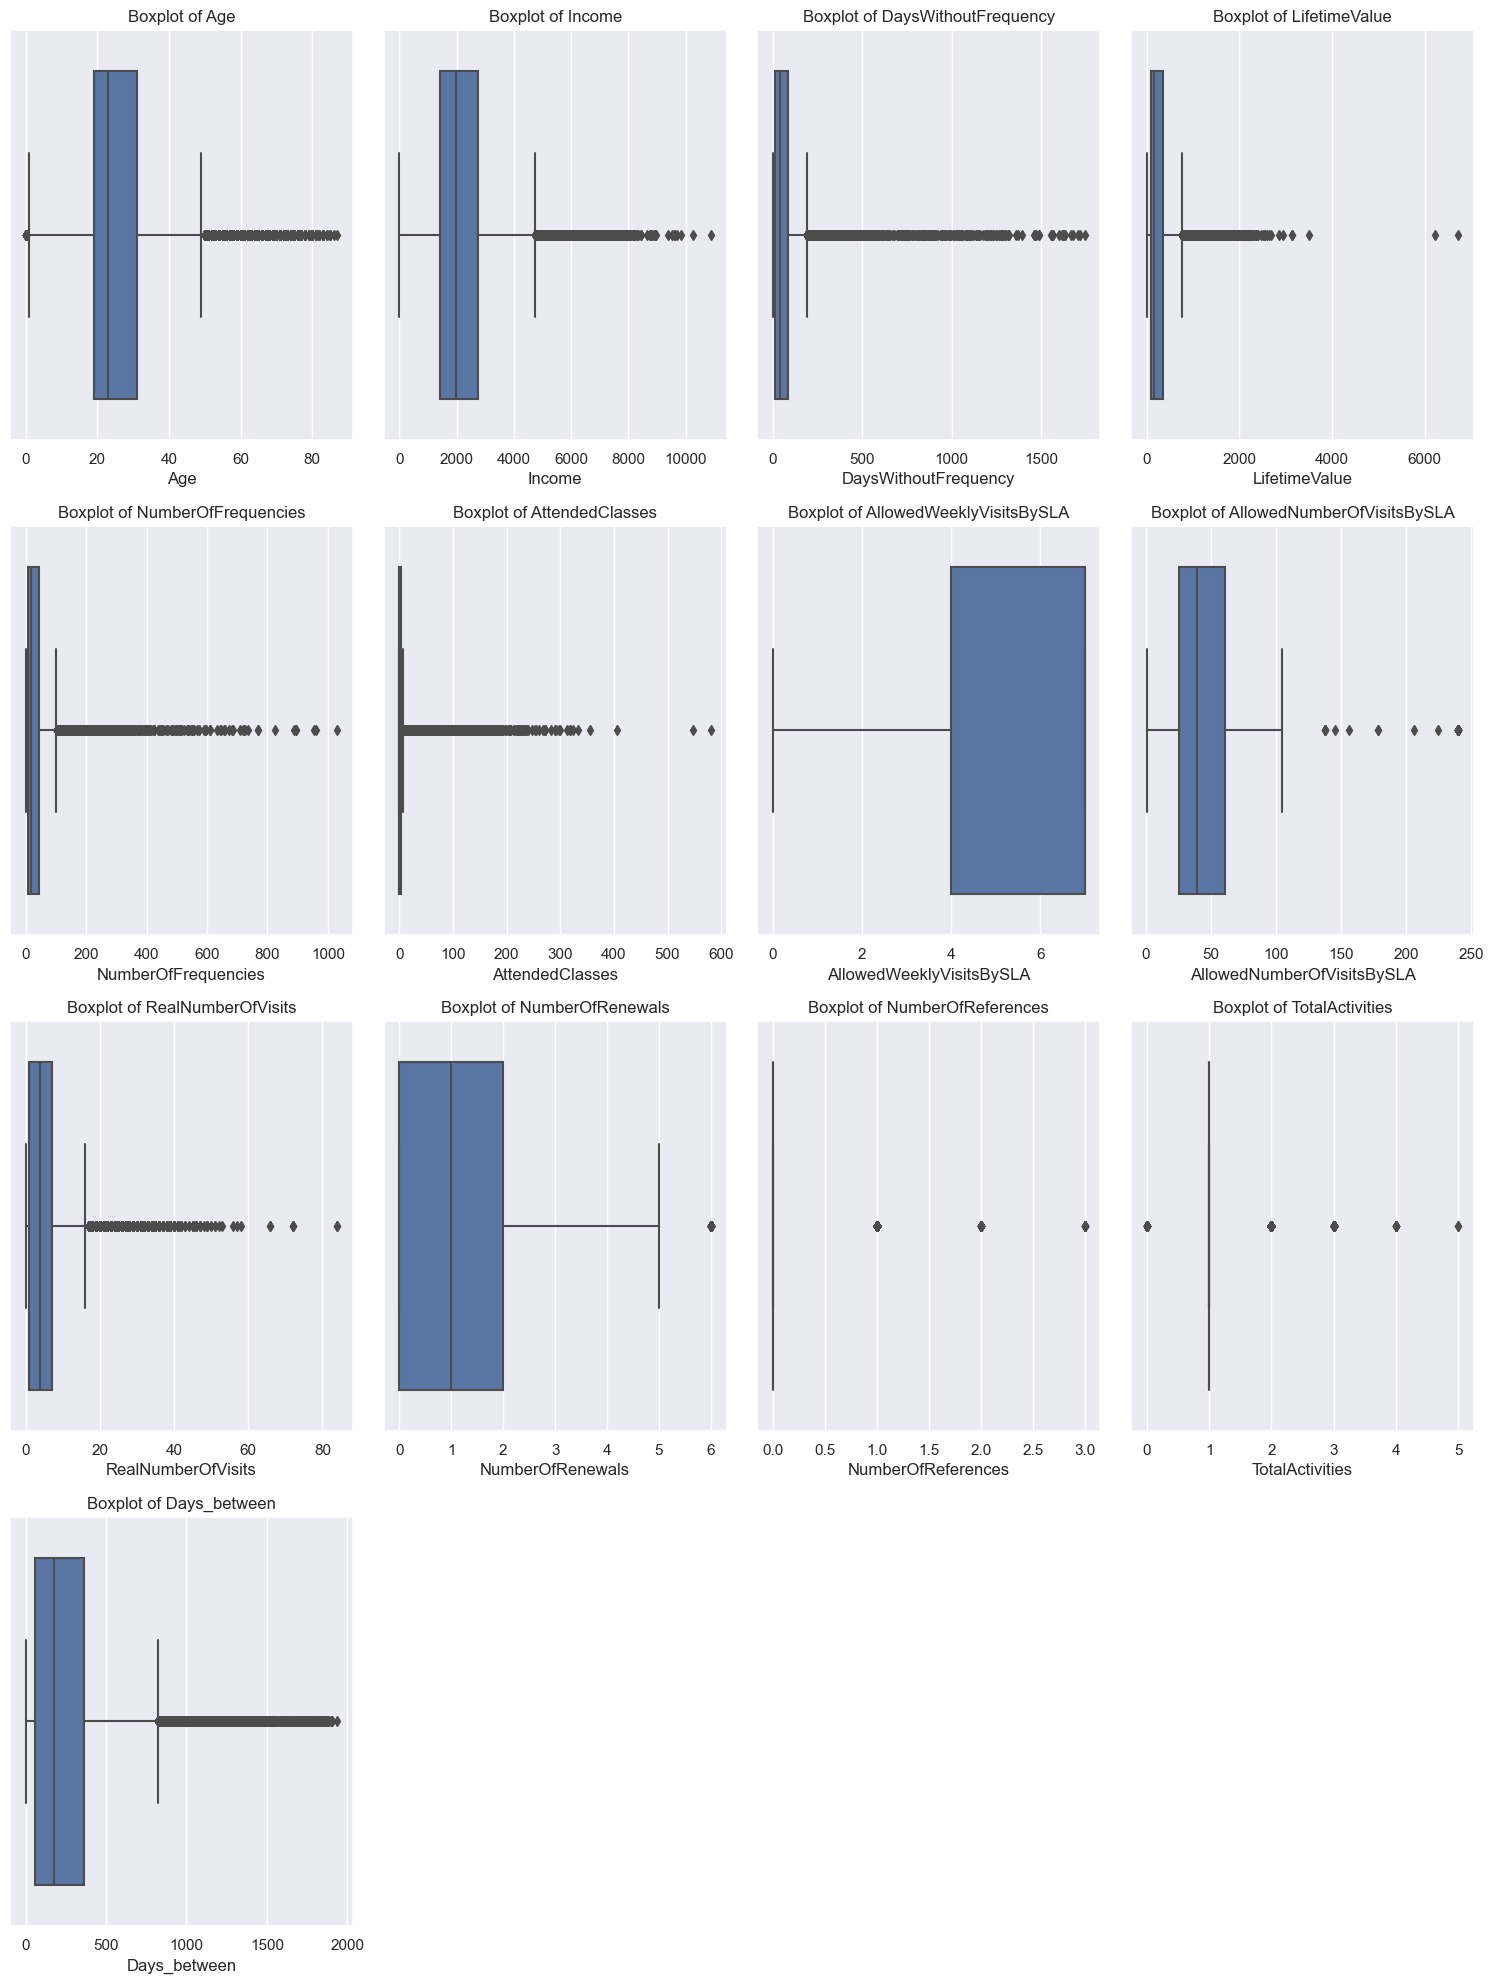

In [313]:
n_rows = int(np.ceil(len(metric_features) / 4))

fig, axs = plt.subplots(n_rows, 4, figsize=(15, n_rows * 5))

axs = axs.flatten()
for ax in axs[len(metric_features):]:
    fig.delaxes(ax)

for i, feature in enumerate(metric_features):
    sns.boxplot(x=df[feature], ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [314]:
q25 = df[metric_features].quantile(.25)
q75 = df[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    q25 = df[metric].quantile(.25)
    q75 = df[metric].quantile(.75)
    iqr = (q75 - q25)

    upper_lim = q75 + 1.5 * iqr
    lower_lim = q25 - 1.5 * iqr

    print('Variable name:', metric)
    print('Lower Limit:', lower_lim)
    print('Upper Limit:', upper_lim)
    print('')

# filters2 = pd.Series(np.all(filters2, 0))
# df_2 = df[filters2]
# print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0],4))

Variable name: Age
Lower Limit: 1.0
Upper Limit: 49.0

Variable name: Income
Lower Limit: -575.0
Upper Limit: 4745.0

Variable name: DaysWithoutFrequency
Lower Limit: -93.5
Upper Limit: 190.5

Variable name: LifetimeValue
Lower Limit: -323.65
Upper Limit: 762.35

Variable name: NumberOfFrequencies
Lower Limit: -50.0
Upper Limit: 102.0

Variable name: AttendedClasses
Lower Limit: -4.5
Upper Limit: 7.5

Variable name: AllowedWeeklyVisitsBySLA
Lower Limit: -0.5
Upper Limit: 11.5

Variable name: AllowedNumberOfVisitsBySLA
Lower Limit: -27.155
Upper Limit: 113.845

Variable name: RealNumberOfVisits
Lower Limit: -8.0
Upper Limit: 16.0

Variable name: NumberOfRenewals
Lower Limit: -3.0
Upper Limit: 5.0

Variable name: NumberOfReferences
Lower Limit: 0.0
Upper Limit: 0.0

Variable name: TotalActivities
Lower Limit: 1.0
Upper Limit: 1.0

Variable name: Days_between
Lower Limit: -403.5
Upper Limit: 824.5



In [315]:
q25 = df[metric_features].quantile(.25)
q75 = df[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
df_2 = df[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
q25 = df[metric_features].quantile(.25)
q75 = df[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr



# Calculate percentage of outliers for each metric feature
outliers = ((df[metric_features]< lower_lim) | (df[metric_features] > upper_lim)).any(axis=1)
percentage_outliers = outliers.sum() / len(df) * 100

print(f"Percentage of outliers in the entire dataset: {percentage_outliers:.2f}%")

In [ ]:
filters2 = (
    (df['Age']<=78)
    &
    (df['Income']<=8000)  #check better
    &
   (df['DaysWithoutFrequency']<=900)   #variable percentage of days that could go according to the plan.
    &
    (df['LifetimeValue']<=4200)
    &
    (df['NumberOfFrequencies']<=400)
    #&
   # (df['RealNumberOfVisits']<=100)



)

df_filters2 = df[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_filters2.shape[0] / df.shape[0], 4))

In [ ]:
# Get the manual filtering version
df = df_filters2.copy()

## Feature Selection

### Metric Features

Between the metric_feature we are going to drop DaysWithoutFrequency, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, 

In [ ]:
df[metric_features].var()

In [ ]:
# Since no variable as a variance of 0, we dont need to drop any variable here

In [ ]:
#scaler = StandardScaler()
#df[metric_features] = scaler.fit_transform(df[metric_features])
scaler = MinMaxScaler()
df[metric_features] = scaler.fit_transform(df[metric_features])
#scaled_feat

In [ ]:
df[metric_features]

In [ ]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [ ]:
cor_spearman = df[metric_features].corr(method ='spearman')
cor_spearman

In [ ]:
cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are two pairs of variables highly correlated, namely:
    - Age vs Income (0.9) 
    - NumerOfFrequencies vs LifetimeValue (0.7) 
    - NumerOfRenewals vs LifetimeValue (0.7)
    - AllowedNumberOfVisitsBySLA vs AllowedWeeklyVisitsBySLA (0.7)
    - AttendedClasses vs AllowedWeeklyVisitsBySLA (-0.8)
    
We need to use other techniques of feature selection to decide which variables should we keep (another possible approach was to remove the LifetimeValue and AllowedWeeklyVisitsBySLA since they are highly correlated with 2 variables).
We choose Age instead of Income because we think that Age is a more important factor in a gym context than Income (because normally the monthly fee is fixed so the income will not really change this. We also think that customers with different ages engage in different activities more than customers with different incomes).

In [ ]:
metric_features.remove('Income')
metric_features.remove('LifetimeValue')
metric_features.remove('AllowedWeeklyVisitsBySLA')

### Principal Components Analysis

In [ ]:
df_pca = df.copy()

In [ ]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat 

In [ ]:
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Inkfree.ttf', name='Ink Free', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\WINGDNG2.TTF', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuib.ttf', name='Segoe UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyhbd.ttc', name='Microsoft YaHei', style='normal', variant='norm

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mvboli.ttf', name='MV Boli', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DUBAI-BOLD.TTF', name='Dubai', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugib.ttf', name='Gadugi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisli.ttf', name='Segoe UI', style='italic', variant='normal', weight=350, stretch='normal', size='scalable')) = 11.0975
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.


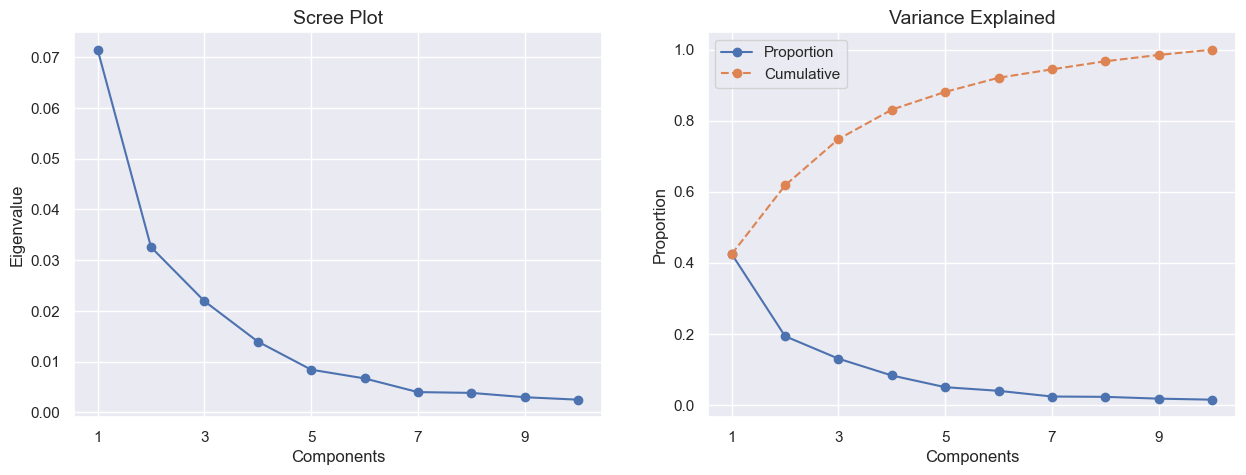

In [ ]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [ ]:
# 3 rules of Thumb: 
# 1 rule: Keeping up to 80% of the variance (on the comulative) 
# 2 rule: Look at the Elbow on the EIGENVALUES (EXPLAINED VARIANCE) 

In [ ]:
# In this case: 
# 1 rule: 5,6 Principal Components 
# 2 rule: 4 Principal Components
# 3 rule: PC var greater or equal to 0.1 -> 3, 4 Principal Components

In [ ]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=6)
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

In [ ]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

In [ ]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

### Non Metric Features

In [ ]:
non_metric_features

In [ ]:
# phik_corr_matrix = df[non_metric_features].phik_matrix()

# # Plotting a heatmap for the PhiK correlation matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(phik_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('PhiK Correlation Heatmap')
# plt.show()

Activities: 

FitnessActivities vs WaterActivities (0.82)
FitnessActivities vs TeamActivities (0.37)
FitnessActivities vs RacketActivities (0.23)
FitnessActivities vs CombatActivities (0.39)
CombatActivities vs WaterActivities (0.25)

AthleticsActivities have no corr with other activities except a very low one with FitnessActivities (0.11)

SpecialActivities have no corr with other activities except a very low one with OtherActivities (0.16) 

Gender vs FitnessActivities (0.16)
Gender vs TeamActivities (0.16)
Gender vs CombatActivities (0.16)

UseByTime vs Dropout (0.17)

HasReferences vs WaterActivities (0.21)
HasReferences vs FitnessActivities (0.17)

Dropout vs WaterActivities (0.28)
Dropout vs FitnessActivities (0.24)
Dropout vs TeamActivities (0.10)
Dropout vs RacketActivities (0.10)
Dropout vs SpecialActivities (0.10)

Fitness and Water Activities are highly negative correlated

In [ ]:
non_metric_features.remove('EnrollmentStart')
non_metric_features.remove('EnrollmentFinish')
non_metric_features.remove('LastPeriodStart')
non_metric_features.remove('LastPeriodFinish')
non_metric_features.remove('DateLastVisit')
non_metric_features.remove('DanceActivities')
non_metric_features.remove('NatureActivities')

In [ ]:
non_metric_features

In [ ]:
df_ohc = df.copy()

In [ ]:
ohc = OneHotEncoder(sparse_output=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df

In [ ]:
df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)
df_ohc.head()

In [ ]:
df_ohc.drop(['EnrollmentStart','EnrollmentFinish','LastPeriodStart','LastPeriodFinish','DateLastVisit'], axis=1, inplace=True)

In [ ]:
df = df_ohc.copy()

# Clustering Part

### How can we combine the 2 algorithms?

Use high K for KMeans

Use HC (Hierarchical Clustering) to reduce to a smaller number

Use HC to find K

## Using DBSCAN to remove outliers

In [ ]:
metric_features

In [ ]:
metric_features.remove('Days_between')

In [ ]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df[metric_features])
distances, _ = neigh.kneighbors(df[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.yticks(np.arange(0, max(distances)+0.5, 0.5))
plt.axhline(y=0.25, color='r', linestyle='--')
plt.show()

In [ ]:
# Based on the hyperparameters found in the previous class
dbscan = DBSCAN(eps=0.25, min_samples=18, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df[metric_features])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

In [ ]:
Counter(dbscan_labels)

In [ ]:
df_out = df[dbscan_labels==-1].copy()

# New df without outliers
df = df[dbscan_labels!=-1].copy()

In [ ]:
# Split variables into perspectives

demographics = ['Age','NumberOfRenewals','NumberOfReferences','TotalActivities']
usage = ['DaysWithoutFrequency','NumberOfFrequencies','RealNumberOfVisits','AllowedNumberOfVisitsBySLA','AttendedClasses']

df_dem = df[demographics].copy()
df_usage = df[usage].copy()

## Testing on K-means and Hierarchical clustering

In [ ]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [ ]:
def plot_inertia(df, features, range_clusters, n_init, random_state):
    
    inertia = []
    
    for n_clus in range_clusters:  # Iterate over desired ncluster range
        kmclust = KMeans(n_clusters = n_clus, init="k-means++", n_init=n_init, random_state=random_state)
        kmclust.fit(df[features])
        inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
        
    # The inertia plot
    plt.figure(figsize=(20,15))
    plt.plot(inertia)
    plt.ylabel("Inertia: SSw")
    plt.xlabel("Number of clusters")
    plt.title("Inertia plot over clusters", size=15)
    plt.show()

In [ ]:
def Cluster_Profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [ ]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        
        # get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels', index=df.index)), axis=1)  
        
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        
        
        # remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels)  
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

## Demographic

### Kmeans & Hierarchical Clustering

In [ ]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_dem, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_dem, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Inkfree.ttf', name='Ink Free', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\WINGDNG2.TTF', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuib.ttf', name='Segoe UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyhbd.ttc', name='Microsoft YaHei', style='normal', variant='norm

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mvboli.ttf', name='MV Boli', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DUBAI-BOLD.TTF', name='Dubai', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugib.ttf', name='Gadugi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisli.ttf', name='Segoe UI', style='italic', variant='normal', weight=350, stretch='normal', size='scalable')) = 11.0975
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=21.0.
findfont: score(FontEntry(fname='C:\\Us

findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal',

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyh.ttc', name='Microsoft YaHei', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candaral.ttf', name='Candara', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msjhbd.ttc', name='Microsoft JhengHei', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiai.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebuc.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MTCORSVA.TTF', name='Monotype Corsiva', style='normal', vari

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARIALN.TTF', name='Arial', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 0.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguihis.ttf', name='Segoe UI Historic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sylfaen.ttf', name='Sylfaen', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\WINGDNG3.TTF', name='Wingdings 3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candaraz.ttf', name='Candara', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguiemj.ttf', name='Segoe UI Emoji', style='normal', variant='no

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BKANT.TTF', name='Book Antiqua', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolai.ttf', name='Consolas', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\himalaya.ttf', name='Microsoft Himalaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdanab.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Inkfree.ttf', name='Ink Free', style='normal', variant

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUABI.TTF', name='Book Antiqua', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariali.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothL.ttc', name='Yu Gothic', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbelli.ttf', name='Corbel', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mvboli.ttf', name='MV Boli', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DUBAI-BOLD.TTF', name='Dubai', style='normal', variant='normal', weight=700,

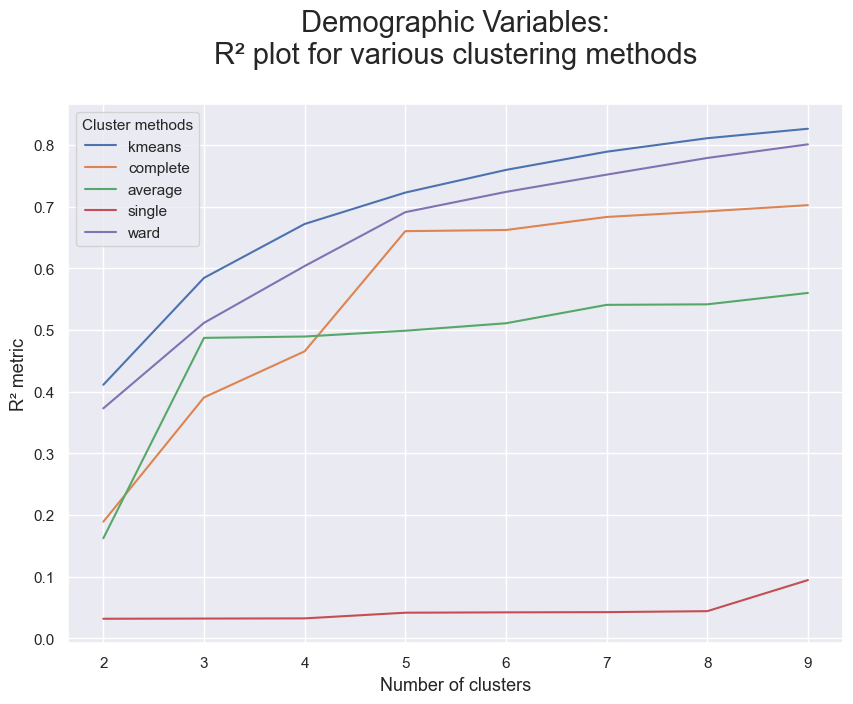

In [ ]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [ ]:
# Better initialization method and provide more n_init
kmclust = KMeans(n_clusters=5, init="k-means++", n_init=20, random_state=1)
km_labels=kmclust.fit_predict(df_dem)
km_cen=kmclust.cluster_centers_

In [ ]:
# Creating a copy of the demographic dataset
df_dem_kmhc=df_dem.copy()

# Creating the labels of our clusters
df_dem_kmhc["KMLabels"]=km_labels

# Creating a copy of the dataset
df_dem_km_label=df_dem_kmhc.copy()

# Group the labels by mean to see the behavior of each cluster
df_dem_kmhc = df_dem_kmhc.groupby("KMLabels").mean() #Reducing the rows to be the clusters
df_dem_kmhc

In [ ]:
df_dem_km_label.KMLabels.value_counts()

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Inkfree.ttf', name='Ink Free', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\WINGDNG2.TTF', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuib.ttf', name='Segoe UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyhbd.ttc', name='Microsoft YaHei', style='normal', variant='norm

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mvboli.ttf', name='MV Boli', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DUBAI-BOLD.TTF', name='Dubai', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugib.ttf', name='Gadugi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisli.ttf', name='Segoe UI', style='italic', variant='normal', weight=350, stretch='normal', size='scalable')) = 11.4775
findfont: Matching sans\-serif:style=normal:variant=normal:weight=heavy:stretch=normal:size=13.0 to Arial ('C:\\Windows\\Fonts\\arialbd.ttf') with score of 0.145000.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=23.0.
findfont: score(FontEntry(fname='C:\\U

findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\sebas\\anaconda3\\envs\\datam\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal',

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyh.ttc', name='Microsoft YaHei', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candaral.ttf', name='Candara', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msjhbd.ttc', name='Microsoft JhengHei', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\georgiai.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebuc.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MTCORSVA.TTF', name='Monotype Corsiva', style='normal', vari

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARIALN.TTF', name='Arial', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 0.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguihis.ttf', name='Segoe UI Historic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\sylfaen.ttf', name='Sylfaen', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\WINGDNG3.TTF', name='Wingdings 3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Candaraz.ttf', name='Candara', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguiemj.ttf', name='Segoe UI Emoji', style='normal', variant='no

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BKANT.TTF', name='Book Antiqua', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\consolai.ttf', name='Consolas', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\himalaya.ttf', name='Microsoft Himalaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\verdanab.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Inkfree.ttf', name='Ink Free', style='normal', variant

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ANTQUABI.TTF', name='Book Antiqua', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariali.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothL.ttc', name='Yu Gothic', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbelli.ttf', name='Corbel', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mvboli.ttf', name='MV Boli', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DUBAI-BOLD.TTF', name='Dubai', style='normal', variant='normal', weight=700,

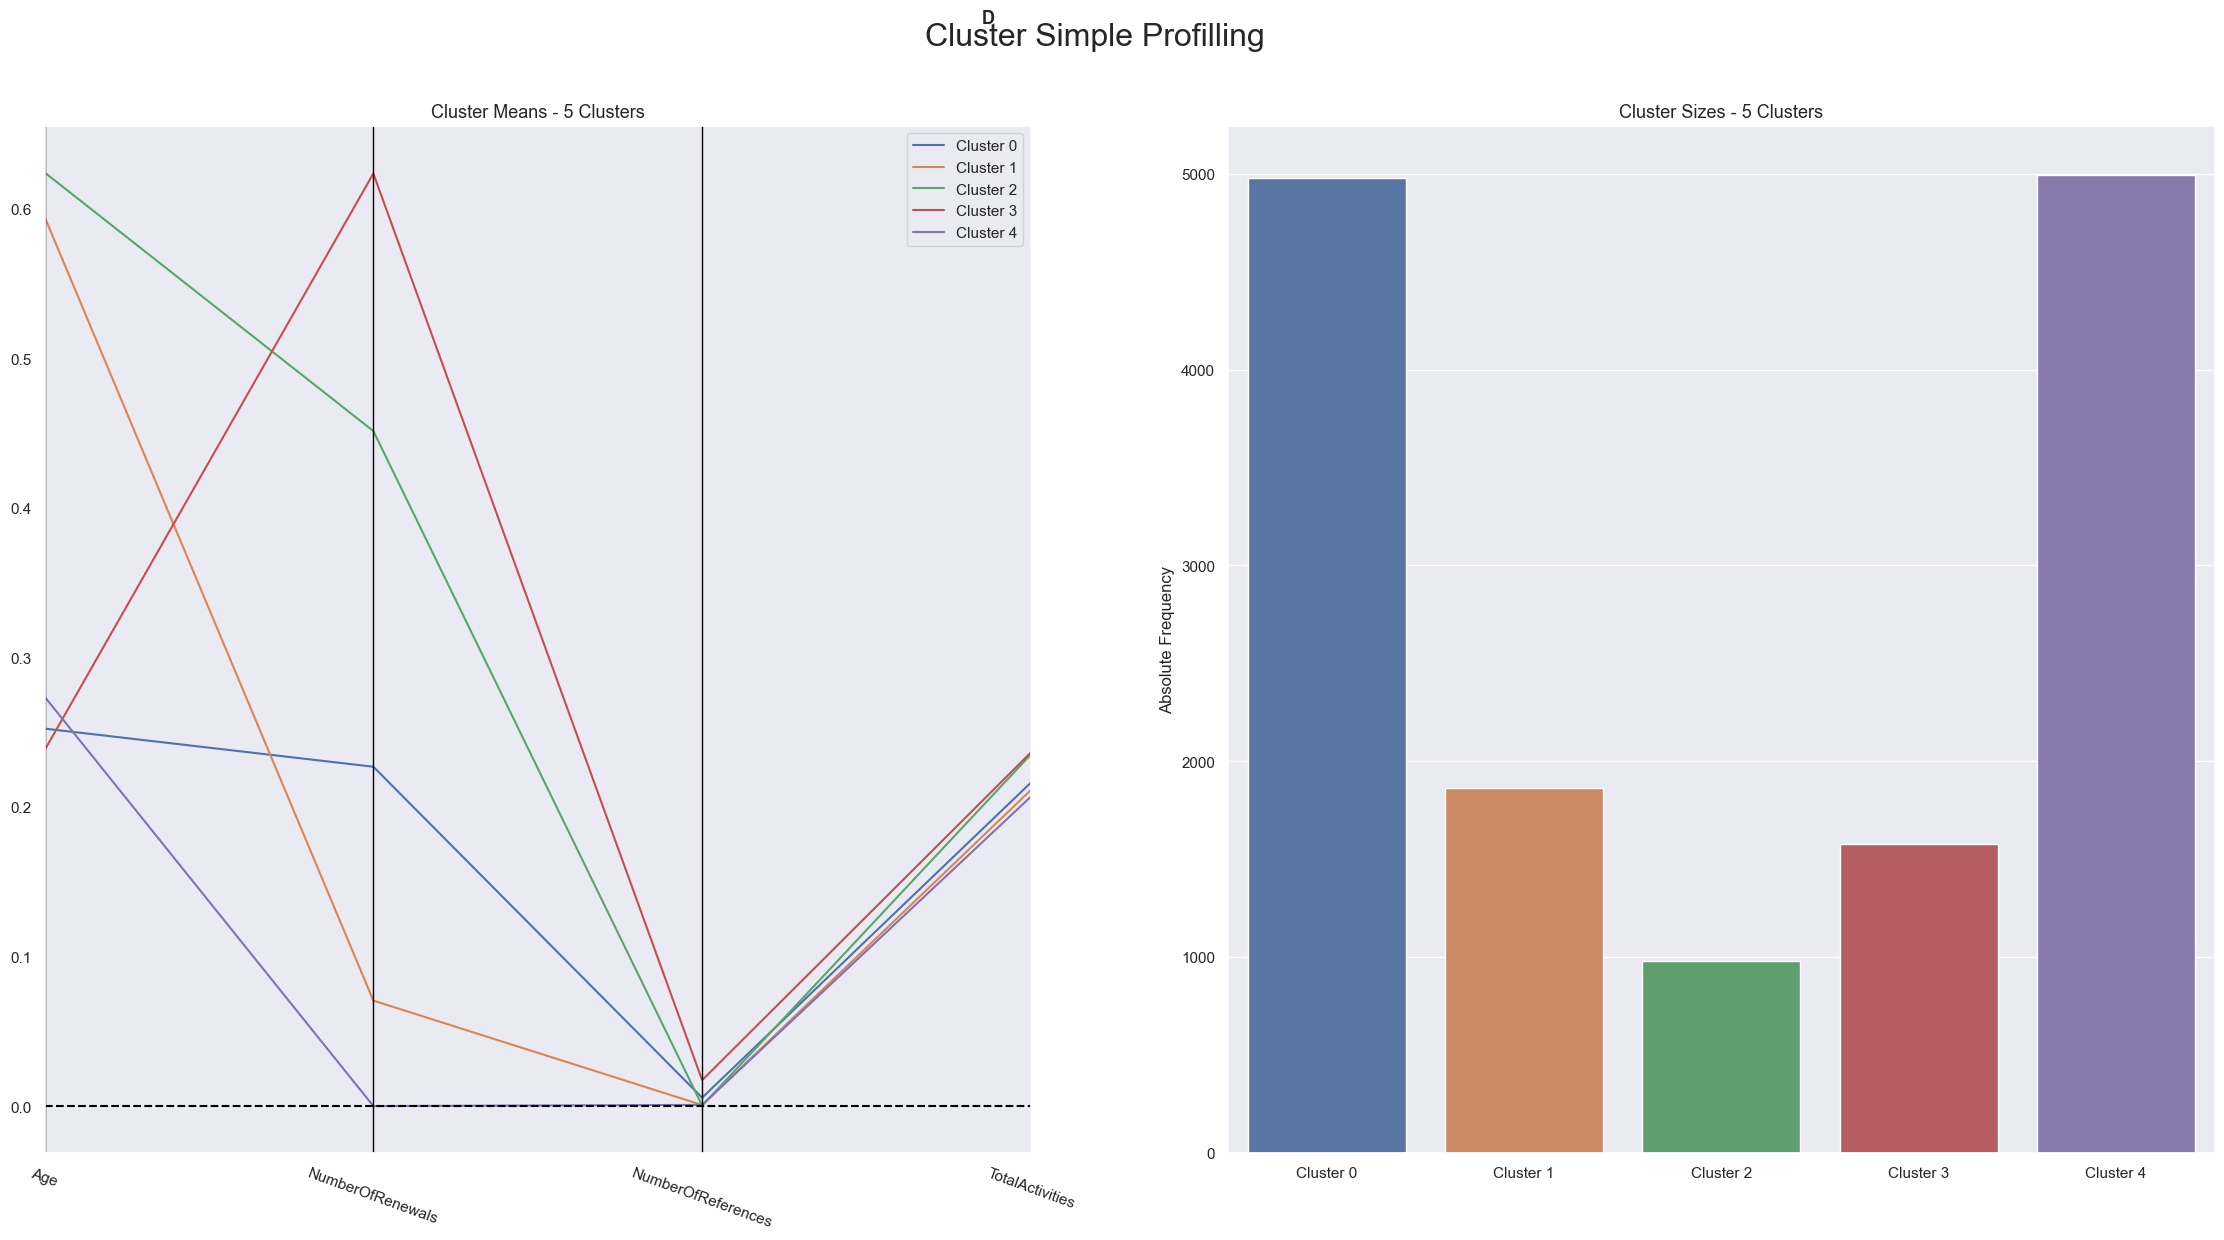

In [ ]:
Cluster_Profiles(df_dem_km_label, label_columns = ["KMLabels"], figsize=(28,13), compar_titles="Demographic Clustering with K-Means")

In [ ]:
# Checking the R2 score
r2(df_dem_km_label,df_dem_km_label['KMLabels'])

In [ ]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df_dem, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [ ]:
# Setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
# By looking to the plot before, it seems that the "ward" is the best method
linkage = "ward"
distance = "euclidean"
# Applying the Agglomerative Clustering with the chosen parameters
kmhc_dem = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
kmhc_dem.fit_predict(df_dem_kmhc)

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\timesbi.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Inkfree.ttf', name='Ink Free', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\WINGDNG2.TTF', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuib.ttf', name='Segoe UI', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyhbd.ttc', name='Microsoft YaHei', style='normal', variant='norm

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\mvboli.ttf', name='MV Boli', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\DUBAI-BOLD.TTF', name='Dubai', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\gadugib.ttf', name='Gadugi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisli.ttf', name='Segoe UI', style='italic', variant='normal', weight=350, stretch='normal', size='scalable')) = 11.0975
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=25.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.


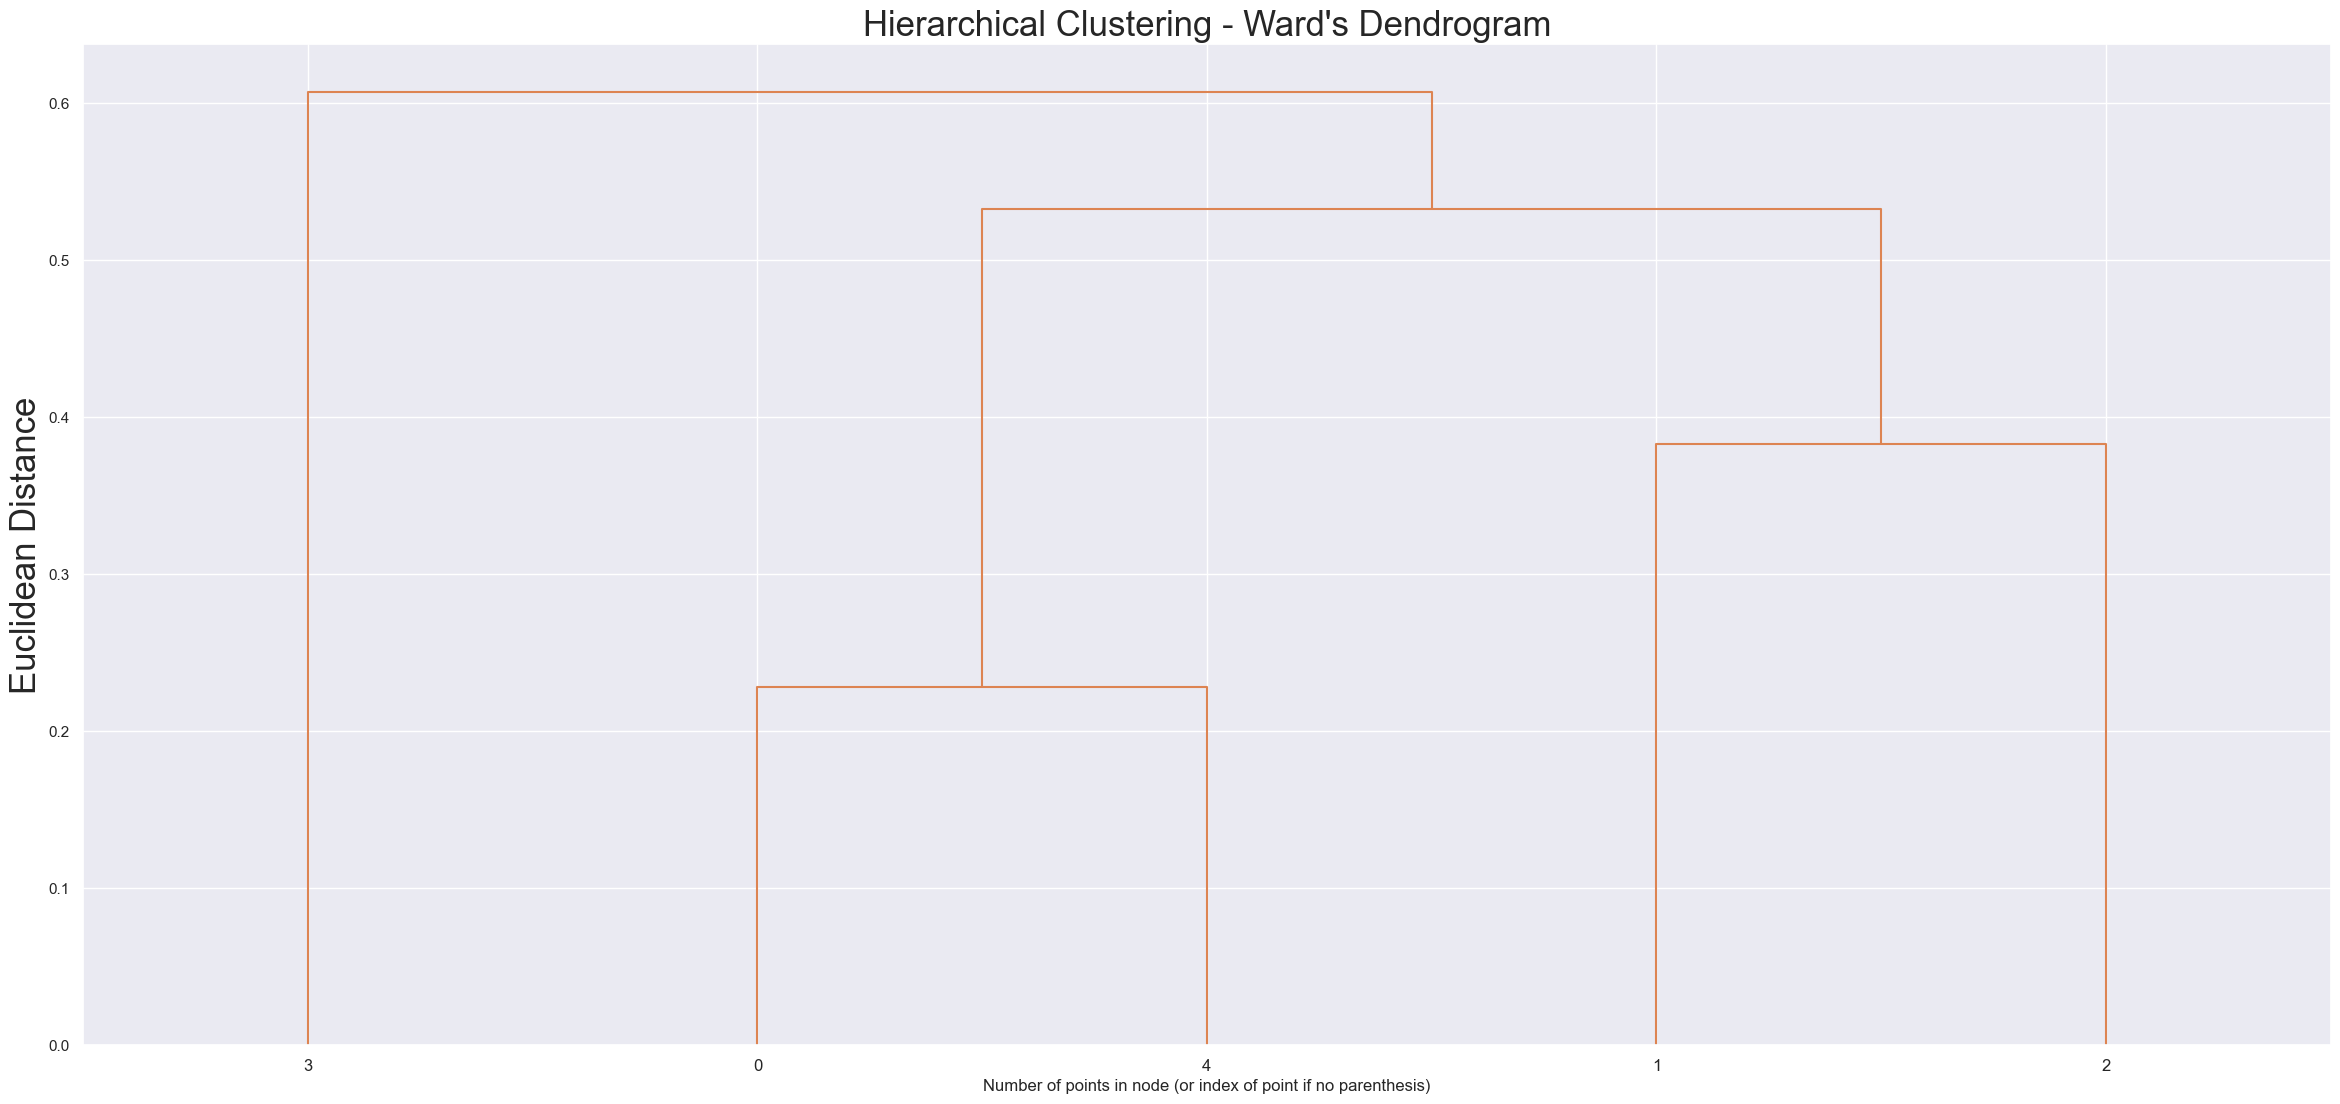

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(kmhc_dem.children_.shape[0])
n_samples = len(kmhc_dem.labels_)

# hc_prod.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(kmhc_dem.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hc_prod.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hc_prod.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [kmhc_dem.children_, kmhc_dem.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(29,13))
# The Dendrogram parameters need to be tuned
y_threshold = 1.5
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=25)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=25)
plt.show()

In [ ]:
# Choosing the linkage and numer of clusters to use
linkage="ward"
number_clusters = 5
# Applying the Agglomerative Clustering with the chosen parameters
kmhc_dem_lust = AgglomerativeClustering(linkage = linkage, affinity = distance, n_clusters = number_clusters)
kmhc_dem_labels = kmhc_dem_lust.fit_predict(df_dem_kmhc)

In [ ]:
# Setting them into a DataFrame
df_hc_labels_km=pd.DataFrame()

# Creating the labels of the HC clusters and for the K-Means clusters
df_hc_labels_km["hc_labels"] = kmhc_dem_labels
df_hc_labels_km["KMLabels"] = df_hc_labels_km.index
df_hc_labels_km

In [ ]:
df_dem_km_label=df_dem_km_label.reset_index()
df_dem_km_label

In [ ]:
df_kmhc_dem = pd.merge(df_dem_km_label,df_hc_labels_km , on="KMLabels")
df_kmhc_dem

In [ ]:
df_kmhc_dem.set_index("ID", inplace=True)
df_kmhc_dem

In [ ]:
df_kmhc_dem.drop("KMLabels",inplace=True,axis=1)

In [ ]:
df_kmhc_dem.hc_labels.value_counts()

In [ ]:
# Group the labels by mean to see the behavior of each HC cluster
df_kmhc_dem.groupby("hc_labels").mean()

In [ ]:
Cluster_Profiles(df_kmhc_dem, label_columns = ["hc_labels"], figsize=(28,13), compar_titles="Demographic Clustering with K-Means & Hierarchical")

In [ ]:
# Checking the R2 score
r2(df_kmhc_dem,df_kmhc_dem['hc_labels'])

### Mean-Shift for Demographic

In [ ]:
bandwidth = estimate_bandwidth(df_dem, quantile=0.25, random_state=1, n_jobs=-1)
bandwidth

In [ ]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_dem)

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

In [ ]:
# Concatenating the labels to df
df_ms_dem = pd.concat([df_dem, pd.Series(ms_labels, index=df.index, name="MSLabels")], axis=1)
df_ms_dem.groupby("MSLabels").mean()

In [ ]:
# Checking the number of customers in each cluster
df_ms_dem.MSLabels.value_counts()

In [ ]:
tsne_model = TSNE(n_components=2, random_state=42)
embedding = tsne_model.fit_transform(df_dem)

In [ ]:

# Plotting the clusters on the t-SNE embedding
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
for cluster_label in np.unique(ms_labels):
    plt.scatter(
        embedding[ms_labels == cluster_label, 0],
        embedding[ms_labels == cluster_label, 1],
        label=f'Cluster {cluster_label}',
        alpha=0.7,
        s=50,
    )

plt.title('Mean Shift Clustering on t-SNE Embedding')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [ ]:
Cluster_Profiles(df_ms_dem, label_columns = ["MSLabels"], figsize=(28,13), compar_titles="Demographic Clustering with Mean-Shift")

In [ ]:
# Checking the R2 score
r2(df_ms_dem,df_ms_dem['MSLabels'])

### DBSCAN for Demographic

In [ ]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_dem)
distances, _ = neigh.kneighbors(df_dem)
distances = np.sort(distances[:, -1])
plt.plot(distances)
# plt.axhline(y=0.1, color='r', linestyle='--')
plt.title("K-distance")
plt.show()

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=8, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_dem)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

In [ ]:
# Concatenating the labels to df
df_dbscan_dem = pd.concat([df_dem, pd.Series(dbscan_labels, index=df.index, name="DBScanLabels")], axis=1)
df_dbscan_dem.groupby("DBScanLabels").mean()

In [ ]:
# Checking the number of customers in each cluster
df_dbscan_dem.DBScanLabels.value_counts()

In [ ]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_dem_tsne = tsne.fit_transform(df_dem)

# Create a DataFrame with t-SNE results and DBSCAN labels
df_tsne_dbscan = pd.DataFrame({'tsne_1': df_dem_tsne[:, 0],
                               'tsne_2': df_dem_tsne[:, 1],
                               'dbscan_labels': dbscan_labels})

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne_dbscan['tsne_1'], df_tsne_dbscan['tsne_2'], c=df_tsne_dbscan['dbscan_labels'], cmap='viridis', s=20)
plt.title('DBSCAN Clustering via t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster Labels')
plt.show()

In [ ]:
Cluster_Profiles(df_dbscan_dem, label_columns = ["DBScanLabels"], figsize=(28,13), compar_titles="Demographic Clustering with DBScan")

In [ ]:
# Checking the R2 score
r2(df_dbscan_dem,df_dbscan_dem['DBScanLabels'])

### SOM for Demographic

In [ ]:
# Here we choose the number of random seeds
np.random.seed(42)

# Creating a sm instance 
sm_dem = sompy.SOMFactory().build(
    df_dem.values, 
    mapsize=[50, 50],  
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=demographics
)

sm_dem.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

In [ ]:
# Component planes on the 50x50 grid
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm_dem, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

In [ ]:
# U-matrix of the 50x50 grid
u_dem = sompy.umatrix.UMatrixView(9, 9, "U-Matrix", show_axis = True, text_size = 18, show_text = True)

# Perform the U-Matrix to see the clusters
UMAT_dem = u_dem.show(
    sm_dem, 
    distance = 2,
    row_normalized = False,
    show_data = False, 
    contour = True, # To visualize isomorphic curves
    blob = True
)

In [ ]:
vhts_dem = BmuHitsView(12,12,"Hits Map")
vhts_dem.show(sm_dem, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()

### Kmeans on top of SOM

In [ ]:
# Defining the range of clusters for the algorithm to plot 
range_clusters = range(1, 11)
# Check the elbow plot to decide the number of clusters
plot_inertia(df_dem, demographics,range_clusters, n_init=15, random_state=19)

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=19)
    cluster_labels = kmclust.fit_predict(df_dem)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_dem, cluster_labels, random_state=19)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_dem, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_dem) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [ ]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], ## Plot X-axis; 
         avg_silhouette)     ## Plot Y-axis
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [ ]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
nodeclus_labels_km_dem = kmeans.fit_predict(sm_dem.codebook.matrix)

# Setting the cluster labels of sompy
sm_dem.cluster_labels = nodeclus_labels_km_dem  

hits_km_dem = HitMapView(12, 12,"Clustering", text_size=10)
hits_km_dem.show(sm_dem, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### Hierarchical Clustering on top of SOM units

In [ ]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df_dem, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [ ]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_dem)

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [ ]:
# Perform Hierarchical clustering on top of the 2500 units (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=5, linkage='ward')
nodeclus_labels_hr_dem = hierclust.fit_predict(sm_dem.codebook.matrix)
sm_dem.cluster_labels = nodeclus_labels_hr_dem  # setting the cluster labels of sompy

hits_hr_dem  = HitMapView(12, 12,"Clustering",text_size=10)
hits_hr_dem.show(sm_dem, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### Final SOM Clustering solution

In [ ]:
# Check the nodes and and respective clusters
nodes = sm_dem.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=demographics)
df_nodes['SOM_Labels'] = nodeclus_labels_hr_dem
df_nodes

In [ ]:
# Obtaining SOM's BMUs labels
bmus_map = sm_dem.find_bmu(df_dem)[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((df[demographics], np.expand_dims(bmus_map,1)), axis=1),
    index=df.index, columns=np.append(df[demographics].columns,"BMU")
)
df_bmus

In [ ]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['SOM_Labels'], 'left', left_on="BMU", right_index=True)
df_final

In [ ]:
df_final.groupby("SOM_Labels").mean()

In [ ]:
# Checking the number of customers in each cluster
df_final["SOM_Labels"].value_counts()

In [ ]:
Cluster_Profiles(df_final.drop(columns = "BMU"), label_columns = ["SOM_Labels"], figsize=(28,13), compar_titles="Demographic Clustering with SOM")

In [ ]:
# Checking the R2 score
r2(df_final,df_final['SOM_Labels'])

## Usage

### Kmeans & Hierarchical Clustering

In [ ]:
# Obtaining the R² scores for each cluster solution on product variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_usage, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_usage, hierarchical.set_params(linkage=linkage)
    )

# Visualizing the R² scores for each cluster solution on product variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Usage Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

In [ ]:
# Better initialization method and provide more n_init
kmclust = KMeans(n_clusters=6, init="k-means++", n_init=20, random_state=1)
km_labels=kmclust.fit_predict(df_usage)
km_cen=kmclust.cluster_centers_

In [ ]:
# Creating a copy of the usage dataset
df_usage_kmhc=df_usage.copy()

# Creating the labels of our clusters
df_usage_kmhc["KMLabels"]=km_labels

# Creating a copy of the dataset
df_usage_km_label=df_usage_kmhc.copy()

# Group the labels by mean to see the behavior of each cluster
df_usage_kmhc = df_usage_kmhc.groupby("KMLabels").mean() #Reducing the rows to be the clusters
df_usage_kmhc

In [ ]:
df_usage_km_label.KMLabels.value_counts()

In [ ]:
Cluster_Profiles(df_usage_km_label, label_columns = ["KMLabels"], figsize=(28,13), compar_titles="Usage Clustering with K-Means")

In [ ]:
# Checking the R2 score
r2(df_usage_km_label,df_usage_km_label['KMLabels'])

In [ ]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df_usage, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [ ]:
# Setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
# By looking to the plot before, it seems that the "ward" is the best method
linkage = "ward"
distance = "euclidean"
# Applying the Agglomerative Clustering with the chosen parameters
kmhc_usage = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
kmhc_usage.fit_predict(df_usage_kmhc)

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(kmhc_usage.children_.shape[0])
n_samples = len(kmhc_usage.labels_)

# hc_prod.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(kmhc_usage.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hc_prod.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hc_prod.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [kmhc_usage.children_, kmhc_usage.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(29,13))
# The Dendrogram parameters need to be tuned
y_threshold = 1.5
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=25)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=25)
plt.show()

In [ ]:
# Choosing the linkage and numer of clusters to use
linkage="ward"
number_clusters = 4
# Applying the Agglomerative Clustering with the chosen parameters
kmhc_usage_lust = AgglomerativeClustering(linkage = linkage, affinity = distance, n_clusters = number_clusters)
kmhc_usage_labels = kmhc_usage_lust.fit_predict(df_usage_kmhc)

In [ ]:
# Setting them into a DataFrame
df_hc_labels_km=pd.DataFrame()

# Creating the labels of the HC clusters and for the K-Means clusters
df_hc_labels_km["hc_labels"] = kmhc_usage_labels
df_hc_labels_km["KMLabels"] = df_hc_labels_km.index
df_hc_labels_km

In [ ]:
df_usage_km_label=df_usage_km_label.reset_index()
df_usage_km_label

In [ ]:
df_kmhc_usage = pd.merge(df_usage_km_label,df_hc_labels_km , on="KMLabels")
df_kmhc_usage

In [ ]:
df_kmhc_usage.set_index("ID", inplace=True)
df_kmhc_usage

In [ ]:
df_kmhc_usage.drop("KMLabels",inplace=True,axis=1)

In [ ]:
df_kmhc_usage.groupby("hc_labels").mean()

In [ ]:
Cluster_Profiles(df_kmhc_usage, label_columns = ["hc_labels"], figsize=(28,13), compar_titles="Usage Clustering with K-Means & Hierarchical")

In [ ]:
r2(df_kmhc_usage,df_kmhc_usage['hc_labels'])

### Mean-Shift for Usage

In [ ]:
bandwidth = estimate_bandwidth(df_usage, quantile=0.3, random_state=1, n_jobs=-1)
bandwidth

In [ ]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_usage)

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

In [ ]:
# Concatenating the labels to df
df_ms_usage = pd.concat([df_usage, pd.Series(ms_labels, index=df.index, name="MSLabels")], axis=1)
df_ms_usage.groupby("MSLabels").mean()

In [ ]:
df_ms_usage.MSLabels.value_counts()

In [ ]:
tsne_model = TSNE(n_components=2, random_state=42)
embedding = tsne_model.fit_transform(df_usage)

In [ ]:

# Plotting the clusters on the t-SNE embedding
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
for cluster_label in np.unique(ms_labels):
    plt.scatter(
        embedding[ms_labels == cluster_label, 0],
        embedding[ms_labels == cluster_label, 1],
        label=f'Cluster {cluster_label}',
        alpha=0.7,
        s=50,
    )

plt.title('Mean Shift Clustering on t-SNE Embedding')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [ ]:
Cluster_Profiles(df_ms_usage, label_columns = ["MSLabels"], figsize=(28,13), compar_titles="Usage Clustering with Mean-Shift")

In [ ]:
# Checking the R2 score
r2(df_ms_usage,df_ms_usage['MSLabels'])

### DBSCAN for Usage

In [ ]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_usage)
distances, _ = neigh.kneighbors(df_usage)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.yticks(np.arange(0, max(distances)+0.5, 0.5))
plt.axhline(y=0.07, color='r', linestyle='--')
plt.show()

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.07, min_samples=10, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_usage)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

In [ ]:
# Concatenating the labels to df
df_dbscan_usage = pd.concat([df_usage, pd.Series(dbscan_labels, index=df.index, name="DBScanLabels")], axis=1)
df_dbscan_usage.groupby("DBScanLabels").mean()

In [ ]:
# Checking the number of customers in each cluster
df_dbscan_usage.DBScanLabels.value_counts()

In [ ]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_dem_tsne = tsne.fit_transform(df_usage)

# Create a DataFrame with t-SNE results and DBSCAN labels
df_tsne_dbscan = pd.DataFrame({'tsne_1': df_dem_tsne[:, 0],
                               'tsne_2': df_dem_tsne[:, 1],
                               'dbscan_labels': dbscan_labels})

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne_dbscan['tsne_1'], df_tsne_dbscan['tsne_2'], c=df_tsne_dbscan['dbscan_labels'], cmap='viridis', s=20)
plt.title('DBSCAN Clustering via t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster Labels')
plt.show()

In [ ]:
Cluster_Profiles(df_dbscan_usage, label_columns = ["DBScanLabels"], figsize=(28,13), compar_titles="Demographic Clustering with DBScan")

In [ ]:
r2(df_dbscan_usage,df_dbscan_usage['DBScanLabels'])

### SOM for Usage

In [ ]:
# Here we choose the number of random seeds
np.random.seed(42)

# Creating a sm instance 
sm_usage= sompy.SOMFactory().build(
    df_usage.values, 
    mapsize=[50, 50],  
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=usage
)

sm_usage.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

In [ ]:
# Component planes on the 50x50 grid
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm_usage, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

In [ ]:
# U-matrix of the 50x50 grid
u_usage = sompy.umatrix.UMatrixView(9, 9, "U-Matrix", show_axis = True, text_size = 18, show_text = True)

# Perform the U-Matrix to see the clusters
UMAT_usage = u_usage.show(
    sm_usage, 
    distance = 2,
    row_normalized = False,
    show_data = False, 
    contour = True, # To visualize isomorphic curves
    blob = True
)

In [ ]:
vhts_usage = BmuHitsView(12,12,"Hits Map")
vhts_usage.show(sm_usage, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()

### K-Means on top of SOM

In [ ]:
# Defining the range of clusters for the algorithm to plot 
range_clusters = range(1, 11)
# Check the elbow plot to decide the number of clusters
plot_inertia(df_usage, usage, range_clusters, n_init=15, random_state=19)

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=19)
    cluster_labels = kmclust.fit_predict(df_usage)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_usage, cluster_labels, random_state=19)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_usage, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_usage) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [ ]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], ## Plot X-axis; 
         avg_silhouette)     ## Plot Y-axis
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [ ]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
nodeclus_labels_km_usage = kmeans.fit_predict(sm_usage.codebook.matrix)

# Setting the cluster labels of sompy
sm_usage.cluster_labels = nodeclus_labels_km_usage  

hits_km_usage = HitMapView(12, 12,"Clustering", text_size=10)
hits_km_usage.show(sm_usage, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### Hierarchical Clustering on top of SOM units

In [ ]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df_usage, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [ ]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_usage)

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [ ]:
# Perform Hierarchical clustering on top of the 2500 units (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels_hr_usage = hierclust.fit_predict(sm_usage.codebook.matrix)
sm_usage.cluster_labels = nodeclus_labels_hr_usage  # setting the cluster labels of sompy

hits_hr_usage  = HitMapView(12, 12,"Clustering",text_size=10)
hits_hr_usage.show(sm_usage, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### Final SOM Clustering solution

In [ ]:
# Check the nodes and and respective clusters
nodes = sm_usage.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=usage)
df_nodes['SOM_Labels'] = nodeclus_labels_hr_usage
df_nodes

In [ ]:
# Obtaining SOM's BMUs labels
bmus_map = sm_usage.find_bmu(df_usage)[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((df[usage], np.expand_dims(bmus_map,1)), axis=1),
    index=df.index, columns=np.append(df[usage].columns,"BMU")
)
df_bmus

In [ ]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['SOM_Labels'], 'left', left_on="BMU", right_index=True)
df_final

In [ ]:
df_final.groupby("SOM_Labels").mean()

In [ ]:
df_final["SOM_Labels"].value_counts()

In [ ]:
Cluster_Profiles(df_final.drop(columns = "BMU"), label_columns = ["SOM_Labels"], figsize=(28,13), compar_titles="Usage Clustering with SOM")

In [ ]:
r2(df_final,df_final['SOM_Labels'])

## Merging the Perspectives
- How can we merge different cluster solutions?

In [273]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
kmeans_dem = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
demographic_labels = kmeans_dem.fit_predict(df_dem)

kmeans_usage = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
usage_labels = kmeans_usage.fit_predict(df_usage)

df['demographic_labels'] = demographic_labels
df['usage_labels'] = usage_labels

In [274]:
# Count label frequencies (contigency table)

pd.crosstab(df['demographic_labels'],
            df['usage_labels'])

usage_labels           0    1     2
demographic_labels                 
0                   1157  406  2138
1                    330  257  1588
2                    316  939  7258

2 problems:
- K too large (k = 9). We want to reduce the k (k < 9) depends on your business and the size of it
- we have a cluster with only 257 people (find the next best cluster for these people)

I dont want a cluster with less than 500 people

### Manual merging: Merge lowest frequency clusters into closest clusters

In [275]:
# Centroids of clusters
df_centroids = df.groupby(['demographic_labels', 'usage_labels'])\
    [metric_features].mean()


# Clusters with low frequency to be merged:
# (behavior_labels, product_labels)
to_merge = [(0,0),(1,0),(1,1),(2,1)]


# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(0, 0): (0, 2), (1, 0): (1, 2), (1, 1): (1, 2), (2, 1): (2, 2)}

In [276]:
df_ = df.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_['demographic_labels']==source[0]) & (df_['usage_labels']==source[1])
    df_.loc[mask, 'demographic_labels'] = target[0]
    df_.loc[mask, 'usage_labels'] = target[1]

# New contigency table

pd.crosstab(df_['demographic_labels'],
            df_['usage_labels'])

usage_labels          0    1     2
demographic_labels                
0                     0  406  3295
1                     0    0  2175
2                   316    0  8197

### Merging using Hierarchical clustering

In [277]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['demographic_labels', 'usage_labels'])\
    [metric_features].mean()
df_centroids

Age  DaysWithoutFrequency  \
demographic_labels usage_labels                                   
0                  0             0.279636              0.032267   
                   1             0.286756              0.425713   
                   2             0.253910              0.049385   
1                  0             0.692813              0.025187   
                   1             0.619076              0.303190   
                   2             0.627277              0.050451   
2                  0             0.291383              0.024076   
                   1             0.280058              0.285531   
                   2             0.274821              0.050571   

                                 NumberOfFrequencies  AttendedClasses  \
demographic_labels usage_labels                                         
0                  0                        0.355599         0.120236   
                   1                        0.067309         0.017084   
                   2                        0.087023         0.031981   
1                  0                        0.361023         0.053254   
                   1                        0.038473         0.008041   
                   2                        0.058065         0.010832   
2                  0                        0.264929         0.033314   
                   1                        0.027777         0.003316   
                   2                        0.042196         0.007317   

                                 AllowedNumberOfVisitsBySLA  \
demographic_labels usage_labels                               
0                  0                               0.157331   
                   1                               0.160298   
                   2                               0.153866   
1                  0                               0.199172   
                   1                               0.176654   
                   2                               0.183653   
2                  0                               0.206015   
                   1                               0.142628   
                   2                               0.176935   

                                 RealNumberOfVisits  NumberOfRenewals  \
demographic_labels usage_labels                                         
0                  0                       0.099601          0.567992   
                   1                       0.025686          0.452381   
                   2                       0.046695          0.434051   
1                  0                       0.158153          0.351010   
                   1                       0.018760          0.227626   
                   2                       0.058062          0.128988   
2                  0                       0.192209          0.115506   
                   1                       0.040950          0.151047   
                   2                       0.056293          0.049509   

                                 NumberOfReferences  TotalActivities  
demographic_labels usage_labels                                       
0                  0                       0.014981         0.232325  
                   1                       0.007389         0.230542  
                   2                       0.007951         0.230028  
1                  0                       0.000000         0.229697  
                   1                       0.000000         0.210117  
                   2                       0.001050         0.214484  
2                  0                       0.004219         0.215823  
                   1                       0.005325         0.208094  
                   2                       0.002159         0.209231

In [278]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

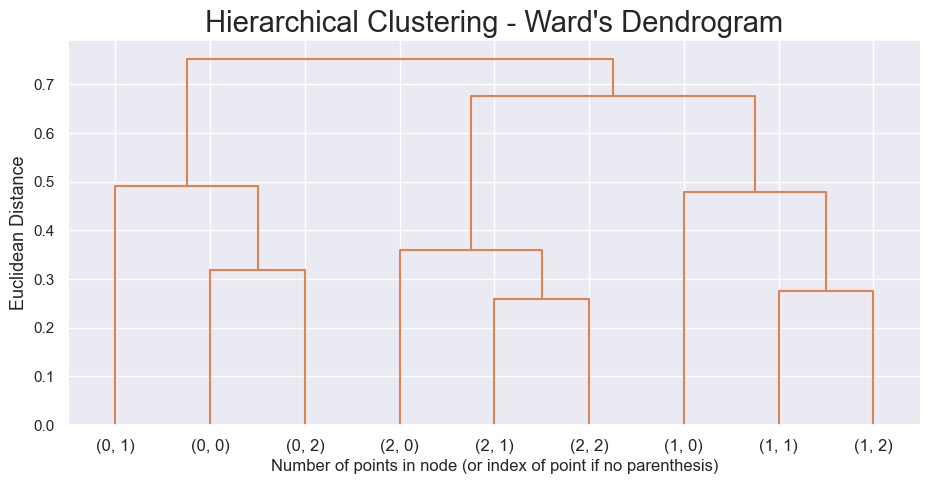

In [279]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 5.5
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [280]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=3         #Should we go with 5?
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Age  DaysWithoutFrequency  \
demographic_labels usage_labels                                   
0                  0             0.279636              0.032267   
                   1             0.286756              0.425713   
                   2             0.253910              0.049385   
1                  0             0.692813              0.025187   
                   1             0.619076              0.303190   
                   2             0.627277              0.050451   
2                  0             0.291383              0.024076   
                   1             0.280058              0.285531   
                   2             0.274821              0.050571   

                                 NumberOfFrequencies  AttendedClasses  \
demographic_labels usage_labels                                         
0                  0                        0.355599         0.120236   
                   1                        0.067309         0.017084   
                   2                        0.087023         0.031981   
1                  0                        0.361023         0.053254   
                   1                        0.038473         0.008041   
                   2                        0.058065         0.010832   
2                  0                        0.264929         0.033314   
                   1                        0.027777         0.003316   
                   2                        0.042196         0.007317   

                                 AllowedNumberOfVisitsBySLA  \
demographic_labels usage_labels                               
0                  0                               0.157331   
                   1                               0.160298   
                   2                               0.153866   
1                  0                               0.199172   
                   1                               0.176654   
                   2                               0.183653   
2                  0                               0.206015   
                   1                               0.142628   
                   2                               0.176935   

                                 RealNumberOfVisits  NumberOfRenewals  \
demographic_labels usage_labels                                         
0                  0                       0.099601          0.567992   
                   1                       0.025686          0.452381   
                   2                       0.046695          0.434051   
1                  0                       0.158153          0.351010   
                   1                       0.018760          0.227626   
                   2                       0.058062          0.128988   
2                  0                       0.192209          0.115506   
                   1                       0.040950          0.151047   
                   2                       0.056293          0.049509   

                                 NumberOfReferences  TotalActivities  \
demographic_labels usage_labels                                        
0                  0                       0.014981         0.232325   
                   1                       0.007389         0.230542   
                   2                       0.007951         0.230028   
1                  0                       0.000000         0.229697   
                   1                       0.000000         0.210117   
                   2                       0.001050         0.214484   
2                  0                       0.004219         0.215823   
                   1                       0.005325         0.208094   
                   2                       0.002159         0.209231   

                                 hclust_labels  
demographic_labels usage_labels                 
0                  0                         0  
                   1                         0  
         

In [281]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['demographic_labels'], row['usage_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

Age  DaysWithoutFrequency  NumberOfFrequencies  \
merged_labels                                                        
0              0.265555              0.085317             0.168822   
1              0.636251              0.076482             0.101716   
2              0.276014              0.075504             0.048873   

               AttendedClasses  AllowedNumberOfVisitsBySLA  \
merged_labels                                                
0                     0.057937                    0.155654   
1                     0.016939                    0.185181   
2                     0.007841                    0.174230   

               RealNumberOfVisits  NumberOfRenewals  NumberOfReferences  \
merged_labels                                                             
0                        0.060929          0.477934            0.010087   
1                        0.068604          0.174330            0.000766   
2                        0.059645          0.063158            0.002584   

               TotalActivities  
merged_labels                   
0                     0.230802  
1                     0.216276  
2                     0.209350

In [282]:
df_

Age    Income  DaysWithoutFrequency  LifetimeValue  \
ID                                                               
10000  0.769231  0.688360              0.001114       0.030404   
10001  0.371795  0.329161              0.066815       0.163060   
10002  0.294872  0.247810              0.007795       0.012794   
10003  0.115385  0.000000              0.024499       0.052879   
10004  0.448718  0.540676              0.233853       0.126991   
...         ...       ...                   ...            ...   
24937  0.179487  0.000000              0.002227       0.496955   
24938  0.500000  0.269086              0.042316       0.117004   
24939  0.256410  0.226533              0.002227       0.014836   
24940  0.705128  0.600751              0.003341       0.268341   
24941  0.410256  0.463079              0.015590       0.312917   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10000               0.0225         0.017241                  0.000000   
10001               0.0575         0.002463                  0.285714   
10002               0.0150         0.000000                  1.000000   
10003               0.0500         0.004926                  0.285714   
10004               0.1025         0.000000                  1.000000   
...                    ...              ...                       ...   
24937               0.2800         0.236453                  0.571429   
24938               0.1425         0.000000                  1.000000   
24939               0.0150         0.000000                  1.000000   
24940               0.4625         0.381773                  0.428571   
24941               0.4225         0.002463                  1.000000   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10000                    0.023886            0.023810          0.000000   
10001                    0.070405            0.011905          0.333333   
10002                    0.123063            0.071429          0.000000   
10003                    0.071658            0.035714          0.000000   
10004                    0.252265            0.000000          0.500000   
...                           ...                 ...               ...   
24937                    0.143149            0.095238          0.500000   
24938                    0.252265            0.035714          0.000000   
24939                    0.123063            0.095238          0.000000   
24940                    0.063933            0.083333          0.333333   
24941                    0.252265            0.154762          0.666667   

       NumberOfReferences  TotalActivities  Days_between  Gender_Male  \
ID                                                                      
10000                 0.0              0.2      0.029928          0.0   
10001                 0.0              0.2      0.205366          0.0   
10002                 0.0              0.2      0.015480          1.0   
10003                 0.0              0.2      0.082559          1.0   
10004                 0.0              0.2      0.401445          1.0   
...                   ...              ...           ...          ...   
24937                 0.0              0.2      0.000000          1.0   
24938                 0.0              0.2      0.134675          1.0   
24939                 0.0              0.2      0.015480          1.0   
24940                 0.0              0.2      0.000000          1.0   
24941                 0.0              0.2      0.601651          0.0   

       UseByTime_True  AthleticsActivities_True  WaterActivities_True  \
ID                                                                      
10000             0.0                       0.0                   0.0   
10001             0.0                       0.0           

In [283]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['demographic_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['usage_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='demographic_labels', columns='usage_labels')

usage_labels           2
demographic_labels      
0                   3701
1                   2175
2                   8513

In [284]:
# Setting df to have the final product, behavior and merged clusters
df = df_.copy()

In [285]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

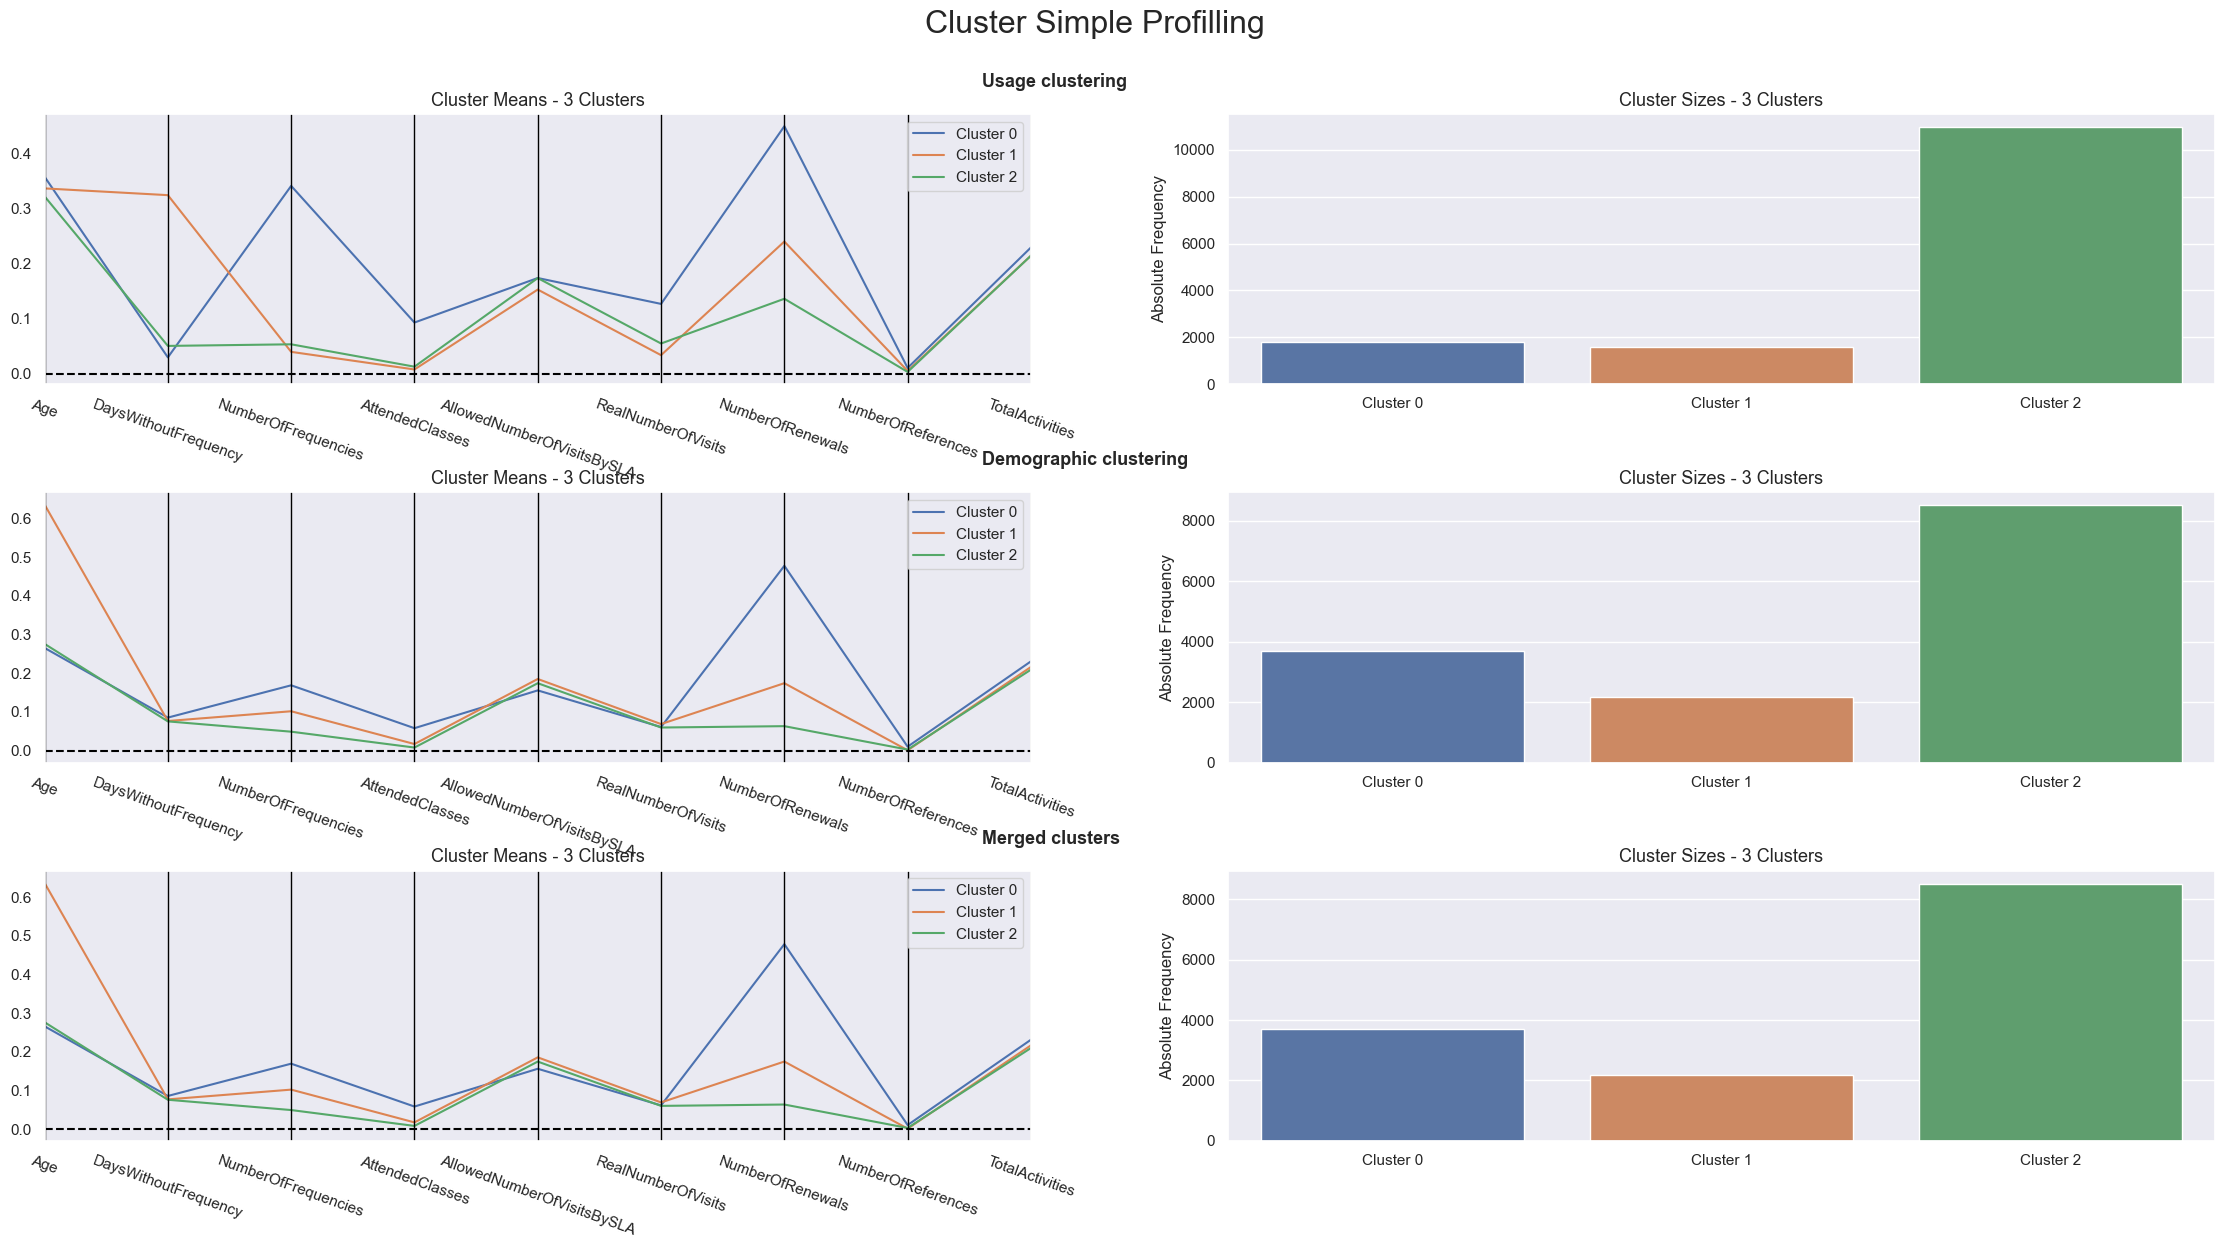

In [286]:
# Assuming metric_features contains the names of columns you want from df
selected_columns = df[metric_features + ['usage_labels', 'demographic_labels', 'merged_labels']]

# Assuming cluster_profiles accepts a DataFrame for df
cluster_profiles(
    df=selected_columns,
    label_columns=['usage_labels', 'demographic_labels', 'merged_labels'],
    figsize=(28, 13),
    compar_titles=["Usage clustering", "Demographic clustering", "Merged clusters"]
)

## profiling with unused / categorical features

In [287]:
non_metric_features

['Gender',
 'UseByTime',
 'AthleticsActivities',
 'WaterActivities',
 'FitnessActivities',
 'TeamActivities',
 'RacketActivities',
 'CombatActivities',
 'SpecialActivities',
 'OtherActivities',
 'HasReferences',
 'Dropout']

In [288]:
### Profiling with all activities??
df

Age    Income  DaysWithoutFrequency  LifetimeValue  \
ID                                                               
10000  0.769231  0.688360              0.001114       0.030404   
10001  0.371795  0.329161              0.066815       0.163060   
10002  0.294872  0.247810              0.007795       0.012794   
10003  0.115385  0.000000              0.024499       0.052879   
10004  0.448718  0.540676              0.233853       0.126991   
...         ...       ...                   ...            ...   
24937  0.179487  0.000000              0.002227       0.496955   
24938  0.500000  0.269086              0.042316       0.117004   
24939  0.256410  0.226533              0.002227       0.014836   
24940  0.705128  0.600751              0.003341       0.268341   
24941  0.410256  0.463079              0.015590       0.312917   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10000               0.0225         0.017241                  0.000000   
10001               0.0575         0.002463                  0.285714   
10002               0.0150         0.000000                  1.000000   
10003               0.0500         0.004926                  0.285714   
10004               0.1025         0.000000                  1.000000   
...                    ...              ...                       ...   
24937               0.2800         0.236453                  0.571429   
24938               0.1425         0.000000                  1.000000   
24939               0.0150         0.000000                  1.000000   
24940               0.4625         0.381773                  0.428571   
24941               0.4225         0.002463                  1.000000   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10000                    0.023886            0.023810          0.000000   
10001                    0.070405            0.011905          0.333333   
10002                    0.123063            0.071429          0.000000   
10003                    0.071658            0.035714          0.000000   
10004                    0.252265            0.000000          0.500000   
...                           ...                 ...               ...   
24937                    0.143149            0.095238          0.500000   
24938                    0.252265            0.035714          0.000000   
24939                    0.123063            0.095238          0.000000   
24940                    0.063933            0.083333          0.333333   
24941                    0.252265            0.154762          0.666667   

       NumberOfReferences  TotalActivities  Days_between  Gender_Male  \
ID                                                                      
10000                 0.0              0.2      0.029928          0.0   
10001                 0.0              0.2      0.205366          0.0   
10002                 0.0              0.2      0.015480          1.0   
10003                 0.0              0.2      0.082559          1.0   
10004                 0.0              0.2      0.401445          1.0   
...                   ...              ...           ...          ...   
24937                 0.0              0.2      0.000000          1.0   
24938                 0.0              0.2      0.134675          1.0   
24939                 0.0              0.2      0.015480          1.0   
24940                 0.0              0.2      0.000000          1.0   
24941                 0.0              0.2      0.601651          0.0   

       UseByTime_True  AthleticsActivities_True  WaterActivities_True  \
ID                                                                      
10000             0.0                       0.0                   0.0   
10001             0.0                       0.0           

In [289]:
df_act = df[['merged_labels','AthleticsActivities_True', 'WaterActivities_True',
       'FitnessActivities_True', 'TeamActivities_True',
       'RacketActivities_True', 'CombatActivities_True',
       'SpecialActivities_True', 'OtherActivities_True']].groupby(['merged_labels']).mean()

In [290]:
df[['merged_labels']].groupby(['merged_labels']).value_counts()

merged_labels
0    3701
1    2175
2    8513
Name: count, dtype: int64

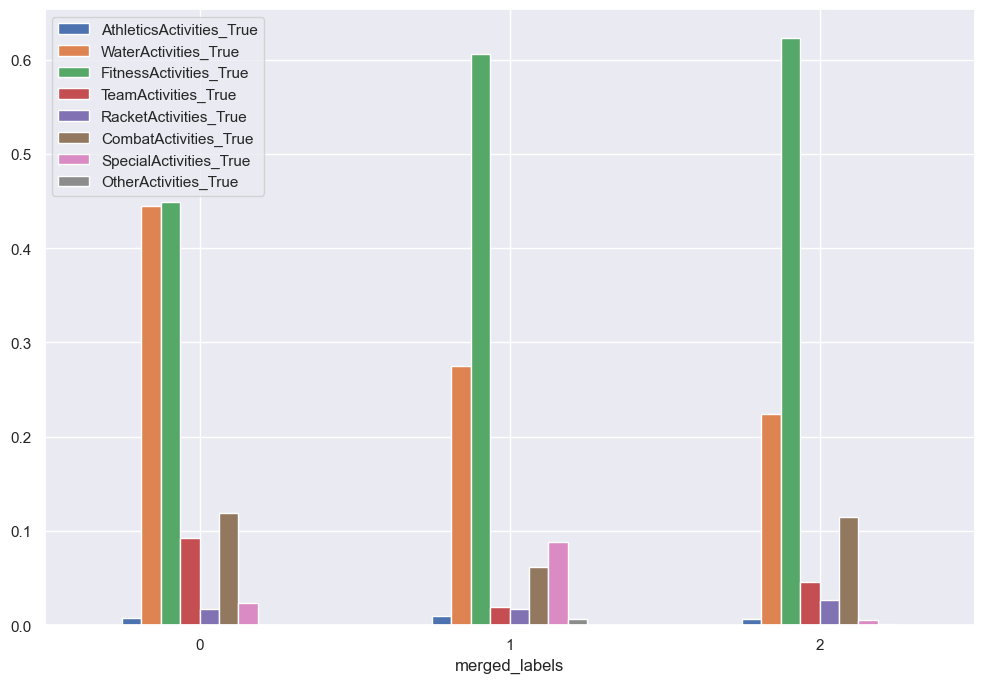

In [291]:
fig, ax = plt.subplots(figsize=(12,8))
df_act.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.show()

In [292]:
df_act

AthleticsActivities_True  WaterActivities_True  \
merged_labels                                                   
0                              0.007836              0.445015   
1                              0.009195              0.274483   
2                              0.005991              0.224128   

               FitnessActivities_True  TeamActivities_True  \
merged_labels                                                
0                            0.448798             0.092407   
1                            0.606437             0.018851   
2                            0.622577             0.045577   

               RacketActivities_True  CombatActivities_True  \
merged_labels                                                 
0                           0.016752               0.118887   
1                           0.017011               0.061149   
2                           0.026900               0.114648   

               SpecialActivities_True  OtherActivities_True  
merged_labels                                                
0                            0.023777              0.000540  
1                            0.087816              0.006437  
2                            0.005521              0.001410

## Cluster visualization using t-SNE

In [293]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(df[metric_features])

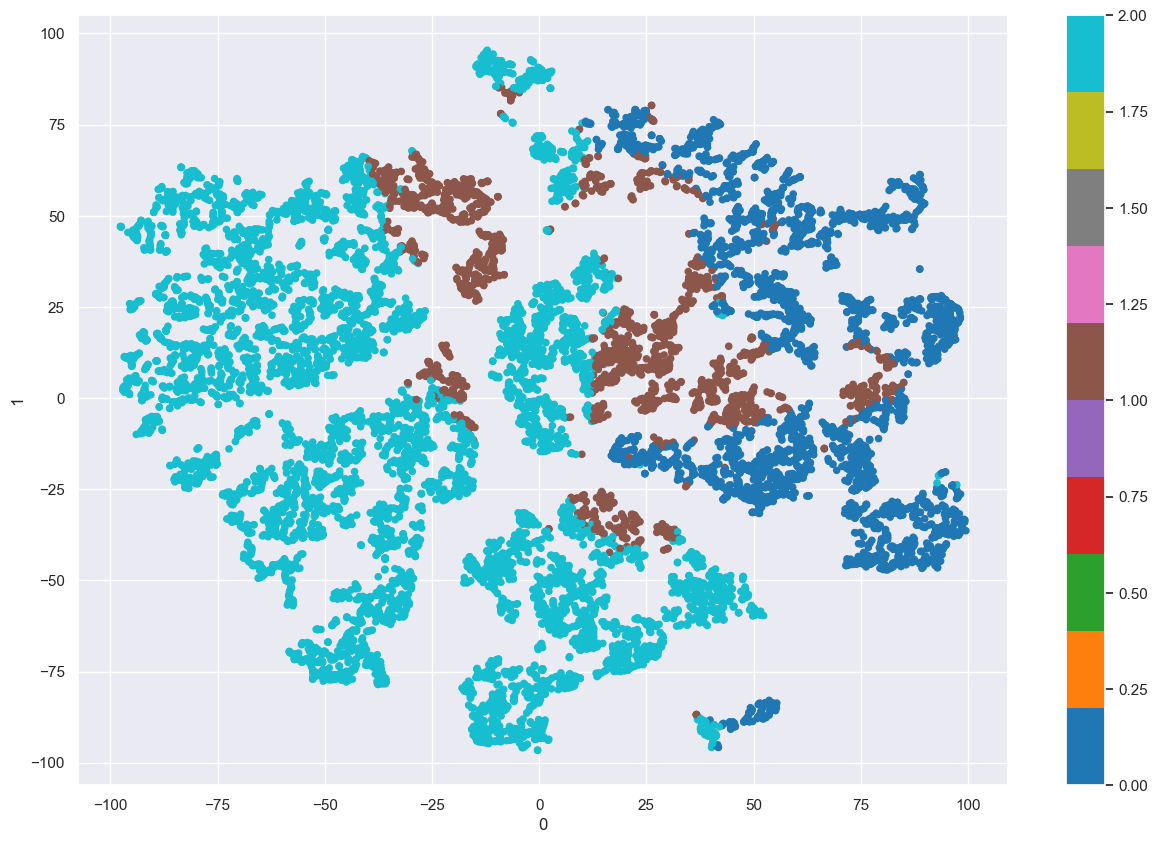

In [294]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

In [295]:
reducer = umap.UMAP()
two_dim_umap = reducer.fit_transform(df[metric_features])

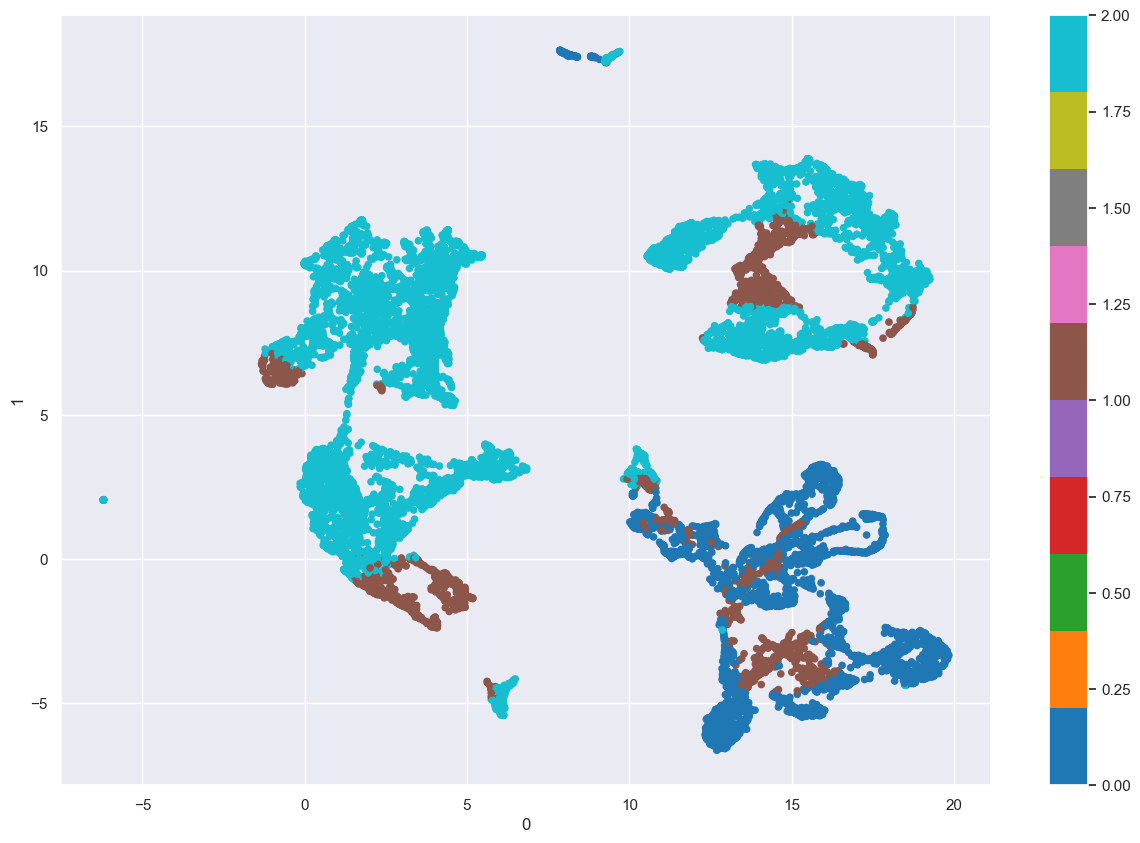

In [296]:
# UMAP visualization
pd.DataFrame(two_dim_umap).plot.scatter(x=0, y=1, c=df['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

## Assess feature importance and reclassify outliers

### Using the R²
What proportion of each variables total SS is explained between clusters?

In [297]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [298]:
r2_variables(df[metric_features + ['merged_labels']], 'merged_labels').drop('merged_labels')

Age                           0.560853
DaysWithoutFrequency          0.001543
NumberOfFrequencies           0.184564
AttendedClasses               0.126883
AllowedNumberOfVisitsBySLA    0.012797
RealNumberOfVisits            0.002037
NumberOfRenewals              0.658405
NumberOfReferences            0.008774
TotalActivities               0.023637
dtype: float64

### Using a Decision Tree
We get the normalized total reduction of the criterion (gini or entropy) brought by that feature (also known as Gini importance).

In [299]:
# Preparing the data
X = df.drop(columns=['usage_labels','demographic_labels','merged_labels'])
y = df.merged_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 97.64% of the customers correctly


In [300]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

Age                           0.401004
Income                        0.000000
DaysWithoutFrequency          0.000000
LifetimeValue                 0.000000
NumberOfFrequencies           0.000000
AttendedClasses               0.000000
AllowedWeeklyVisitsBySLA      0.000000
AllowedNumberOfVisitsBySLA    0.000000
RealNumberOfVisits            0.000000
NumberOfRenewals              0.598996
NumberOfReferences            0.000000
TotalActivities               0.000000
Days_between                  0.000000
Gender_Male                   0.000000
UseByTime_True                0.000000
AthleticsActivities_True      0.000000
WaterActivities_True          0.000000
FitnessActivities_True        0.000000
TeamActivities_True           0.000000
RacketActivities_True         0.000000
CombatActivities_True         0.000000
SpecialActivities_True        0.000000
OtherActivities_True          0.000000
HasReferences_1.0             0.000000
Dropout_True                  0.000000
dtype: float64

In [301]:
# Predicting the cluster labels of the outliers
df_out['merged_labels'] = dt.predict(df_out)               #Here I took the drop smt because in class professor dropped one variable and I don't know why
df_out.head()

Age    Income  DaysWithoutFrequency  LifetimeValue  \
ID                                                               
10036  0.166667  0.000000              0.010022       0.751997   
10233  0.923077  0.699625              0.015590       0.415734   
10260  0.358974  0.320401              0.149220       0.285338   
10271  0.448718  0.125156              0.002227       0.420529   
10299  0.679487  0.594493              0.277283       0.040357   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10036               0.4975         0.408867                  0.285714   
10233               0.4150         0.002463                  1.000000   
10260               0.7275         0.000000                  1.000000   
10271               0.4900         0.470443                  0.285714   
10299               0.0025         0.000000                  1.000000   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10036                    0.069236            0.059524          0.833333   
10233                    0.068693            0.023810          0.833333   
10260                    0.131248            0.000000          0.500000   
10271                    0.026308            0.119048          0.833333   
10299                    0.118679            0.000000          0.166667   

       NumberOfReferences  TotalActivities  Days_between  Gender_Male  \
ID                                                                      
10036            0.333333              0.6      0.000000          0.0   
10233            0.000000              0.4      0.000000          0.0   
10260            0.333333              0.2      0.603715          1.0   
10271            0.000000              0.2      0.000000          0.0   
10299            0.333333              0.2      0.132095          0.0   

       UseByTime_True  AthleticsActivities_True  WaterActivities_True  \
ID                                                                      
10036             0.0                       0.0                   1.0   
10233             0.0                       0.0                   1.0   
10260             0.0                       0.0                   0.0   
10271             0.0                       0.0                   1.0   
10299             0.0                       0.0                   0.0   

       FitnessActivities_True  TeamActivities_True  RacketActivities_True  \
ID                                                                          
10036                     0.0                  1.0                    0.0   
10233                     1.0                  0.0                    0.0   
10260                     1.0                  0.0                    0.0   
10271                     0.0                  0.0                    0.0   
10299                     1.0                  0.0                    0.0   

       CombatActivities_True  SpecialActivities_True  OtherActivities_True  \
ID                                                                           
10036                    1.0                     0.0                   0.0   
10233                    0.0                     0.0                   0.0   
10260                    0.0                     0.0                   0.0   
10271                    0.0                     0.0                   0.0   
10299                    0.0                     0.0                   0.0   

       HasReferences_1.0  Dropout_True  merged_labels  
ID                                                     
10036                1.0           0.0              0  
10233                0.0           0.0              0  
10260                1.0           1.0              0  
10271                0.0           0.0              0  
10299                1.0           1.0              1

In [302]:
df_out.merged_labels.value_counts()

merged_labels
0    225
1     31
2     24
Name: count, dtype: int64

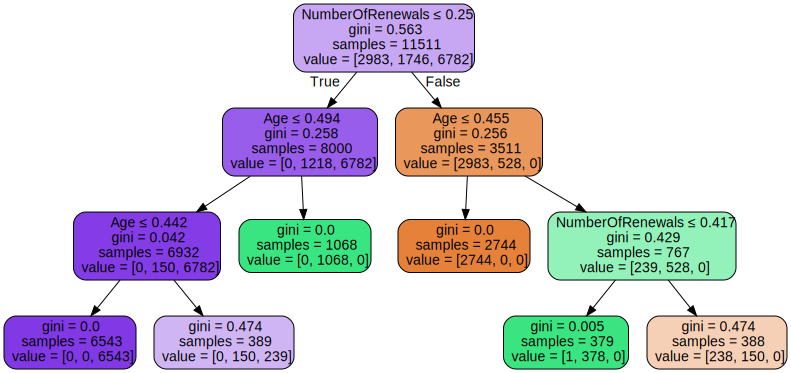

In [303]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)
g = graphviz.Source(dot_data)
g

In [304]:
df_reset = df.reset_index()
df_out_reset = df_out.reset_index()
merged_df = pd.concat([df_reset, df_out_reset], ignore_index=True)

In [305]:
merged_df

ID       Age    Income  DaysWithoutFrequency  LifetimeValue  \
0      10000  0.769231  0.688360              0.001114       0.030404   
1      10001  0.371795  0.329161              0.066815       0.163060   
2      10002  0.294872  0.247810              0.007795       0.012794   
3      10003  0.115385  0.000000              0.024499       0.052879   
4      10004  0.448718  0.540676              0.233853       0.126991   
...      ...       ...       ...                   ...            ...   
14664  24722  0.371795  0.352941              0.038976       0.018239   
14665  24827  0.012821  0.000000              0.236080       0.100619   
14666  24832  0.564103  0.503129              0.238307       0.307779   
14667  24841  0.371795  0.300375              0.012249       0.301552   
14668  24893  0.833333  0.989987              0.006682       0.638526   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
0                   0.0225         0.017241                  0.000000   
1                   0.0575         0.002463                  0.285714   
2                   0.0150         0.000000                  1.000000   
3                   0.0500         0.004926                  0.285714   
4                   0.1025         0.000000                  1.000000   
...                    ...              ...                       ...   
14664               0.0425         0.000000                  1.000000   
14665               0.0350         0.032020                  0.142857   
14666               0.2325         0.177340                  1.000000   
14667               0.2275         0.017241                  1.000000   
14668               0.5525         0.497537                  1.000000   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
0                        0.023886            0.023810          0.000000   
1                        0.070405            0.011905          0.333333   
2                        0.123063            0.071429          0.000000   
3                        0.071658            0.035714          0.000000   
4                        0.252265            0.000000          0.500000   
...                           ...                 ...               ...   
14664                    0.933061            0.214286          0.000000   
14665                    0.034033            0.000000          0.166667   
14666                    0.193803            0.000000          0.500000   
14667                    0.252265            0.202381          0.500000   
14668                    0.252265            0.190476          0.833333   

       NumberOfReferences  TotalActivities  Days_between  Gender_Male  \
0                0.000000              0.2      0.029928          0.0   
1                0.000000              0.2      0.205366          0.0   
2                0.000000              0.2      0.015480          1.0   
3                0.000000              0.2      0.082559          1.0   
4                0.000000              0.2      0.401445          1.0   
...                   ...              ...           ...          ...   
14664            0.000000              0.4      0.031476          1.0   
14665            0.666667              0.2      0.192982          1.0   
14666            0.333333              0.2      0.577915          0.0   
14667            0.000000              0.8      0.455624          1.0   
14668            0.000000              0.2      0.921053          1.0   

       UseByTime_True  AthleticsActivities_True  WaterActivities_True  \
0                 0.0                       0.0                   0.0   
1                 0.0                       0.0                   0.0   
2                 0.0                       0.0                   0.0   
3                 0.0                       0.0                   0.0   
4                 0.0                       0.0                   0.0   
...               ...                   